# Data Pre-Processing

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [4]:
df=pd.read_csv(r"C:\Users\Srinithi\Downloads\ml project\Hotel_Reviews.csv")
print(df.head(5))

                                       Hotel_Address  \
0   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
1   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
2   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
3   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
4   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   

   Additional_Number_of_Scoring Review_Date  Average_Score   Hotel_Name  \
0                           194    8/3/2017            7.7  Hotel Arena   
1                           194    8/3/2017            7.7  Hotel Arena   
2                           194   7/31/2017            7.7  Hotel Arena   
3                           194   7/31/2017            7.7  Hotel Arena   
4                           194   7/24/2017            7.7  Hotel Arena   

  Reviewer_Nationality                                    Negative_Review  \
0              Russia    I am so angry that i made this post available...   
1             Ireland                                     

## Data Cleaning

### Removing Unwanted Columns

In [5]:
print(df.columns)

Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'lat', 'lng'],
      dtype='object')


In [6]:
print(df['Hotel_Name'].unique)

<bound method Series.unique of 0                   Hotel Arena
1                   Hotel Arena
2                   Hotel Arena
3                   Hotel Arena
4                   Hotel Arena
                  ...          
515733    Atlantis Hotel Vienna
515734    Atlantis Hotel Vienna
515735    Atlantis Hotel Vienna
515736    Atlantis Hotel Vienna
515737    Atlantis Hotel Vienna
Name: Hotel_Name, Length: 515738, dtype: object>


In [7]:
print(df.Hotel_Name.nunique())
print(df.Hotel_Address.nunique())

1492
1493


In [8]:
df2 = df[['Hotel_Name', 'Hotel_Address']].drop_duplicates().copy()
print("\nunique Hotel_Name and Hotel_Address pair: ", len(df2), "\nunique Hotel_Name: ", len(df2['Hotel_Name'].unique()), "\nunique Hotel_Address: " , len(df2['Hotel_Address'].unique()))

print("\nValue Count of each columns: ")
print(df2['Hotel_Name'].value_counts().head(3))
print(df2['Hotel_Address'].value_counts().head(3))

print("\n3 Differnt Addresses for Hotel Regina: ")
print(df2[df2['Hotel_Name']=='Hotel Regina'])

print("\n2 Hotels with same address: ")
print(df2[df2['Hotel_Address']=='8 Northumberland Avenue Westminster Borough London WC2N 5BY United Kingdom'])


unique Hotel_Name and Hotel_Address pair:  1494 
unique Hotel_Name:  1492 
unique Hotel_Address:  1493

Value Count of each columns: 
Hotel Regina                               3
Banks Mansion All Inclusive Hotel          1
Arion Cityhotel Vienna und Appartements    1
Name: Hotel_Name, dtype: int64
8 Northumberland Avenue Westminster Borough London WC2N 5BY United Kingdom    2
 s Gravesandestraat 55 Oost 1092 AA Amsterdam Netherlands                     1
Hernalser Hauptstra e 105 17 Hernals 1170 Vienna Austria                      1
Name: Hotel_Address, dtype: int64

3 Differnt Addresses for Hotel Regina: 
          Hotel_Name                                      Hotel_Address
285876  Hotel Regina         Bergara 2 4 Eixample 08002 Barcelona Spain
433920  Hotel Regina  Rooseveltplatz 15 09 Alsergrund 1090 Vienna Au...
472196  Hotel Regina  Via Cesare Correnti 13 Milan City Center 20123...

2 Hotels with same address: 
                                  Hotel_Name  \
247613         The

In [9]:
#Modyfying Names of the Hotel with differnt addresses
df['Hotel_Name'][df['Hotel_Address'].str.startswith("Bergara 2 4 Eixample 08002 Barcelona Spain")] = 'Hotel Regina 1'
df['Hotel_Name'][df['Hotel_Address'].str.startswith("Rooseveltplatz 15 09 Alsergrund 1090 Vienna Au")] = 'Hotel Regina 2'
df['Hotel_Name'][df['Hotel_Address'].str.startswith("Via Cesare Correnti 13 Milan City Center 20123")] = 'Hotel Regina 3'

C:\Users\Srinithi\AppData\Local\Temp\ipykernel_18632\3946017793.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hotel_Name'][df['Hotel_Address'].str.startswith("Bergara 2 4 Eixample 08002 Barcelona Spain")] = 'Hotel Regina 1'
C:\Users\Srinithi\AppData\Local\Temp\ipykernel_18632\3946017793.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hotel_Name'][df['Hotel_Address'].str.startswith("Rooseveltplatz 15 09 Alsergrund 1090 Vienna Au")] = 'Hotel Regina 2'
C:\Users\Srinithi\AppData\Local\Temp\ipykernel_18632\3946017793.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [10]:
#drop unwanted columns incl Addresses
df.drop(['lat', 'lng', 'Hotel_Address' ], axis=1, inplace=True)

In [11]:
df.columns

Index(['Additional_Number_of_Scoring', 'Review_Date', 'Average_Score',
       'Hotel_Name', 'Reviewer_Nationality', 'Negative_Review',
       'Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews',
       'Positive_Review', 'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review'],
      dtype='object')

### Null Values

In [12]:
df[df.isnull().any(axis=1)]
# No Null values

,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review


### Duplicate Entries

In [13]:
df.drop_duplicates(inplace=True)

### Noisy Values

In [14]:
'''
Hotel_Address: Address of hotel.
Review_Date: Date when reviewer posted the corresponding review.
Average_Score: Average Score of the hotel, calculated based on the latest comment in the last year.
Hotel_Name: Name of Hotel
Reviewer_Nationality: Nationality of Reviewer
Negative_Review: Negative Review the reviewer gave to the hotel. If the reviewer does not give the negative review, then it should be: 'No Negative'
ReviewTotalNegativeWordCounts: Total number of words in the negative review.
Positive_Review: Positive Review the reviewer gave to the hotel. If the reviewer does not give the negative review, then it should be: 'No Positive'
ReviewTotalPositiveWordCounts: Total number of words in the positive review.
Reviewer_Score: Score the reviewer has given to the hotel, based on his/her experience
TotalNumberofReviewsReviewerHasGiven: Number of Reviews the reviewers has given in the past.
TotalNumberof_Reviews: Total number of valid reviews the hotel has.
Tags: Tags reviewer gave the hotel.
dayssincereview: Duration between the review date and scrape date.
AdditionalNumberof_Scoring: There are also some guests who just made a scoring on the service rather than a review. This number indicates how many valid scores without review in there.
lat: Latitude of the hotel
lng: longtitude of the hotel
'''

"\nHotel_Address: Address of hotel.\nReview_Date: Date when reviewer posted the corresponding review.\nAverage_Score: Average Score of the hotel, calculated based on the latest comment in the last year.\nHotel_Name: Name of Hotel\nReviewer_Nationality: Nationality of Reviewer\nNegative_Review: Negative Review the reviewer gave to the hotel. If the reviewer does not give the negative review, then it should be: 'No Negative'\nReviewTotalNegativeWordCounts: Total number of words in the negative review.\nPositive_Review: Positive Review the reviewer gave to the hotel. If the reviewer does not give the negative review, then it should be: 'No Positive'\nReviewTotalPositiveWordCounts: Total number of words in the positive review.\nReviewer_Score: Score the reviewer has given to the hotel, based on his/her experience\nTotalNumberofReviewsReviewerHasGiven: Number of Reviews the reviewers has given in the past.\nTotalNumberof_Reviews: Total number of valid reviews the hotel has.\nTags: Tags revi

Dtype:  int64
Min:  1
Q1:  169.0
Median:  342.0
Q3:  660.0
Max:  2682


<AxesSubplot: >

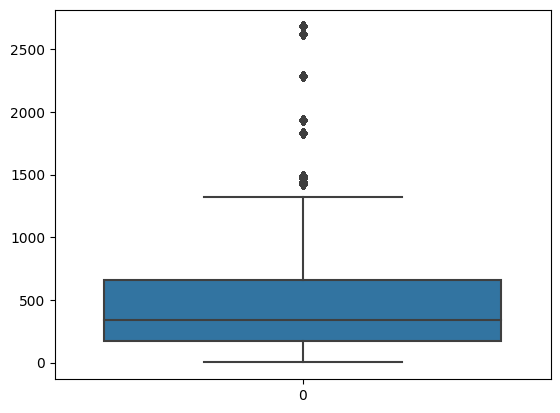

In [15]:
print("Dtype: ",df['Additional_Number_of_Scoring'].dtype)
print("Min: ",df['Additional_Number_of_Scoring'].min())
print("Q1: ",df['Additional_Number_of_Scoring'].quantile(q=0.25))
print("Median: ",df['Additional_Number_of_Scoring'].median())
print("Q3: ",df['Additional_Number_of_Scoring'].quantile(q=0.75))
print("Max: ",df['Additional_Number_of_Scoring'].max())

sns.boxplot(df['Additional_Number_of_Scoring'])

#Right Skewed, No Outlier


In [16]:
df['Review_Date'] = pd.to_datetime(df['Review_Date'])
print("Dtype: ", df['Review_Date'].dtype)

print("Min: ",df['Review_Date'].min())
print("Max: ",df['Review_Date'].max())

print(df['Review_Date'][df['Review_Date'] < '2015-08-04'])
print(df['Review_Date'][df['Review_Date'] > '2017-08-03'])

#All date converted to form


Dtype:  datetime64[ns]
Min:  2015-08-04 00:00:00
Max:  2017-08-03 00:00:00
Series([], Name: Review_Date, dtype: datetime64[ns])
Series([], Name: Review_Date, dtype: datetime64[ns])


In [17]:
print("Dtype: ", df['Negative_Review'].dtype)
print("Unique entries: ", len(df['Negative_Review'].unique()))

## So many duplicate entries

Dtype:  object
Unique entries:  330011


In [18]:
print("Dtype: ", df['Positive_Review'].dtype)
print("Unique entries: ", len(df['Positive_Review'].unique()))

## So many duplicate entries

Dtype:  object
Unique entries:  412601


In [19]:
#Convert all rows of 'days_since_review' to int
df['days_since_review'] = ((pd.to_datetime("8/3/2017") - df['Review_Date']).dt.days)


In [20]:
print("Dtype: ", df['Tags'].dtype)
tagset = set()
for a in df['Tags']:
    a = a[1:-1]
    a = a[1:-1]
    a = a.split("', '")
    for i in a:
        tagset.add(i)
    
print("Total No of Tags: ", len(tagset))


Dtype:  object
Total No of Tags:  2428


In [21]:
df.to_csv(r'C:\Users\Srinithi\Downloads\ml project\hp.csv')

In [22]:
dfsmp = df.drop_duplicates(subset = "Positive_Review").copy()
dfsmp = dfsmp.drop_duplicates(subset = "Negative_Review").copy()
dfsmp = dfsmp.drop_duplicates(subset = "Tags").copy()
dfsmp.to_csv(r'C:\Users\Srinithi\Downloads\ml project\hp_s.csv')

In [23]:
dfsmp.describe()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,days_since_review
count,37346.000000,37346.000000,37346.000000,37346.000000,37346.000000,37346.000000,37346.000000,37346.000000
mean,413.787554,8.414427,32.881995,2318.623976,23.835806,7.487174,8.164936,323.099877
std,459.503516,0.533988,38.291657,2086.088724,25.856774,11.259949,1.580662,213.123191
min,1.000000,6.400000,0.000000,45.000000,0.000000,1.000000,2.500000,0.000000
25%,122.000000,8.100000,11.000000,917.000000,9.000000,1.000000,7.100000,131.000000
50%,255.000000,8.400000,21.000000,1708.000000,16.000000,4.000000,8.300000,316.000000
75%,522.000000,8.800000,39.000000,3003.000000,29.000000,9.000000,9.600000,485.000000
max,2682.000000,9.600000,399.000000,16670.000000,386.000000,355.000000,10.000000,730.000000


# Visualisation

In [24]:
df=pd.read_csv(r"C:\Users\Srinithi\Downloads\ml project\hp_s.csv")

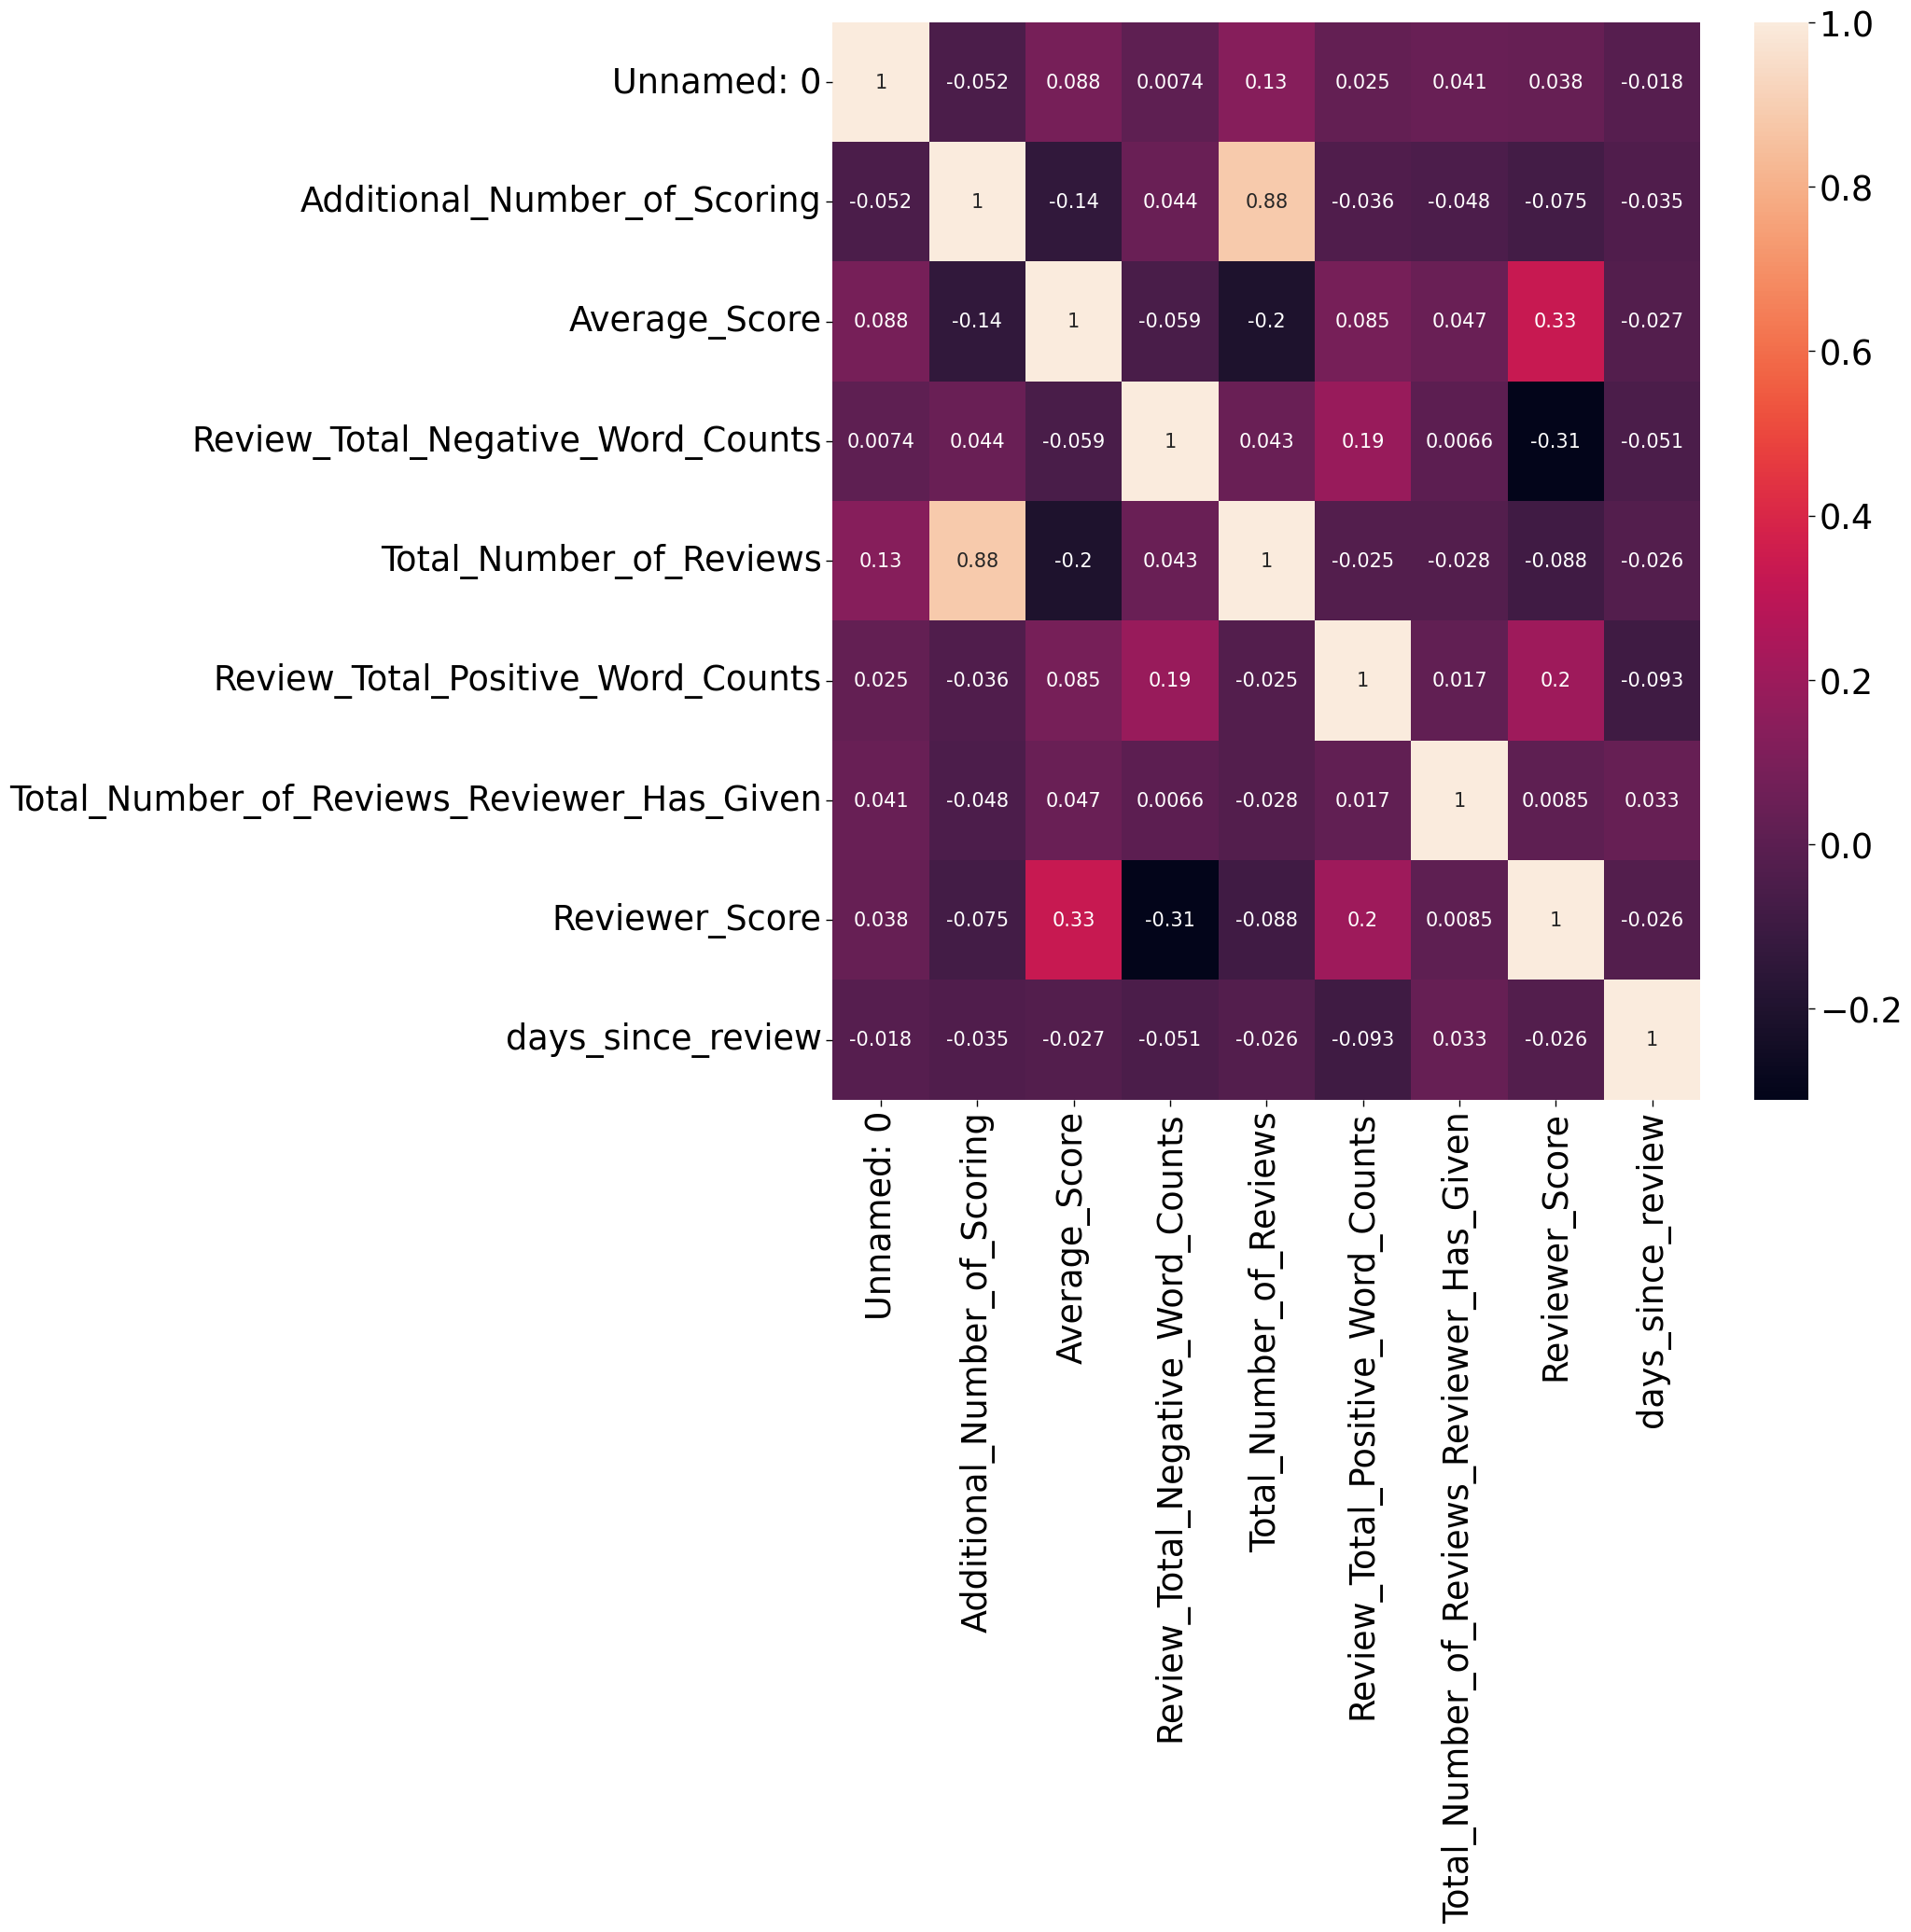

In [25]:
plt.figure(figsize=(15,15))
sns.set_context("paper", font_scale=3,rc={"font.size":15})
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True)
plt.show()

#No Two columns are correlated, so everything is required for Analysis

we can see that there is some correlation between the "Additional_Number_of_Scoring" and "Total_Number_of_Reviews"

[Text(0.5, 1.0, 'Additional_Number_of_Scoring vs Total_Number_of_Reviews')]

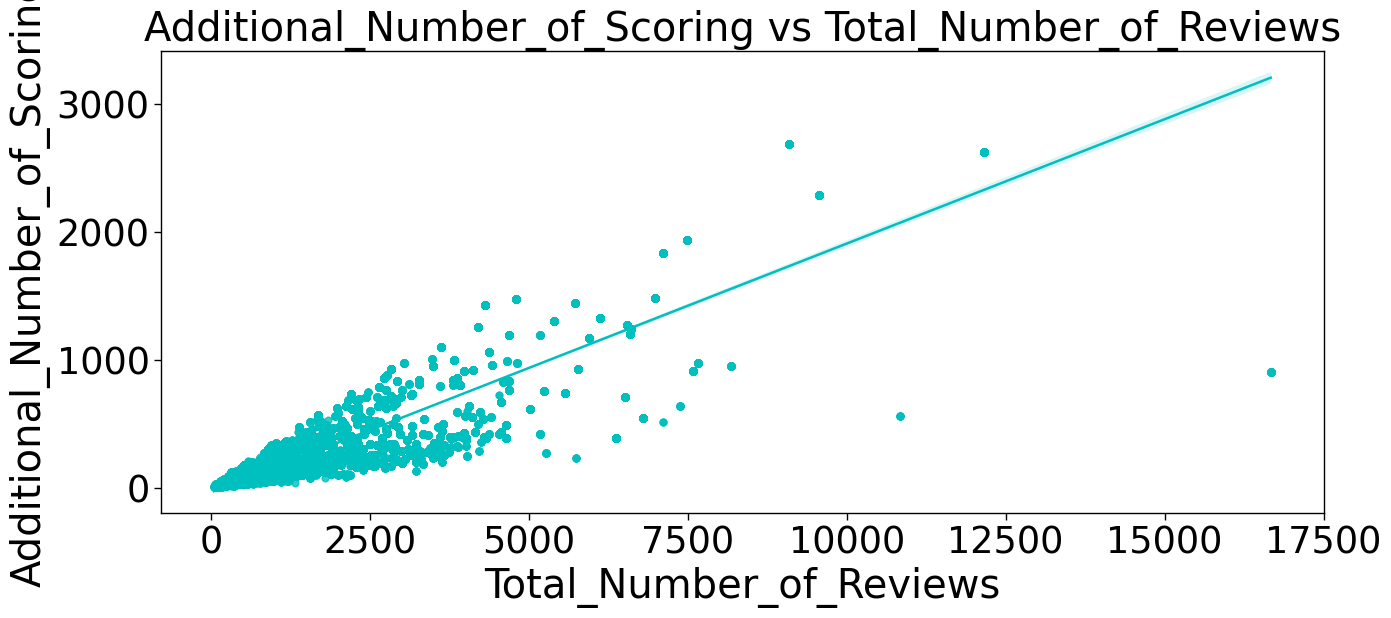

In [26]:
plt.figure(figsize=(15,6))
sns.regplot(data=df,y= "Additional_Number_of_Scoring" , x= "Total_Number_of_Reviews",color="c").set(title="Additional_Number_of_Scoring vs Total_Number_of_Reviews")

Text(0.5, 1.0, 'Distribution of Hotel Average Ratings')

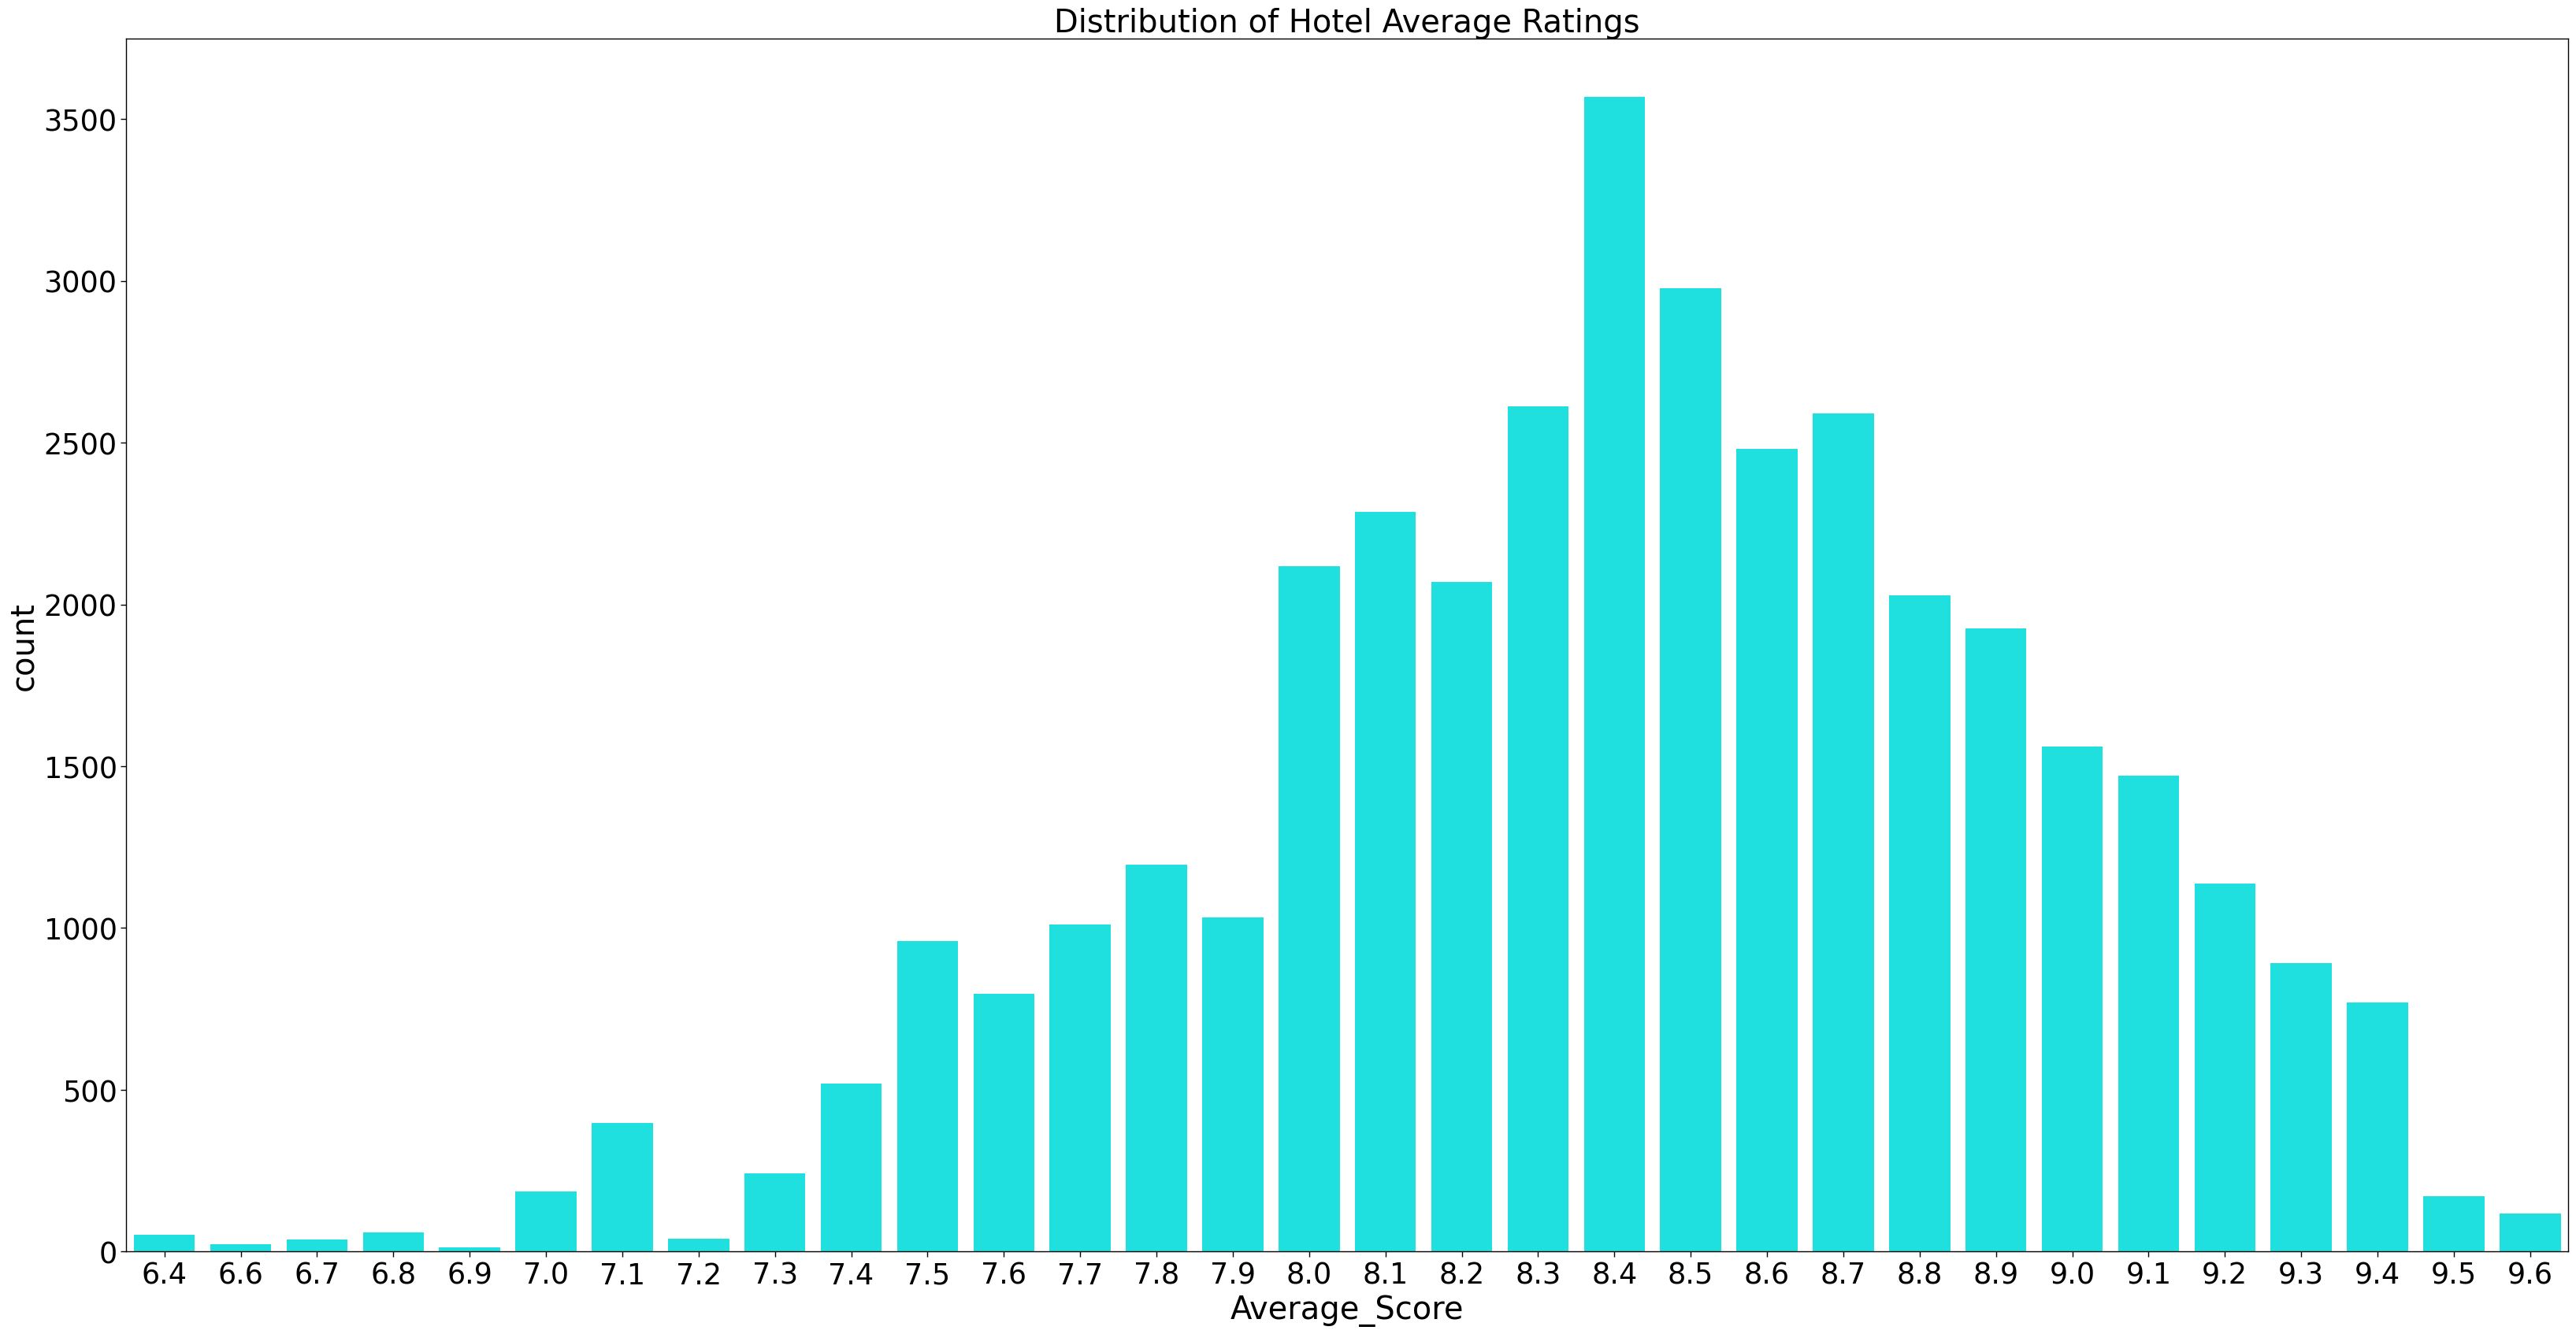

In [27]:
plt.figure(figsize = (40,20))
sns.countplot(x = 'Average_Score',data = df,color = 'cyan')
plt.title("Distribution of Hotel Average Ratings")

In [28]:
reviews_df = pd.DataFrame()
reviews_df["review"] = df["Negative_Review"] + df["Positive_Review"]
reviews_df["is_bad_review"] = df["Reviewer_Score"].apply(lambda x: 1 if x < 5 else 0)
#reviews_df.insert(1, "Rating", extracted_col)
#extracted_col=df["Reviewer_Score"]
reviews_df['is_bad_review'] = reviews_df['is_bad_review'].replace([1], 'positive')
reviews_df['is_bad_review'] = reviews_df['is_bad_review'].replace([0], 'negative')
reviews_df.head()

,review,is_bad_review
0,I am so angry that i made this post available...,positive
1,No Negative No real complaints the hotel was g...,negative
2,Rooms are nice but for elderly a bit difficul...,negative
3,My room was dirty and I was afraid to walk ba...,positive
4,You When I booked with your company on line y...,negative


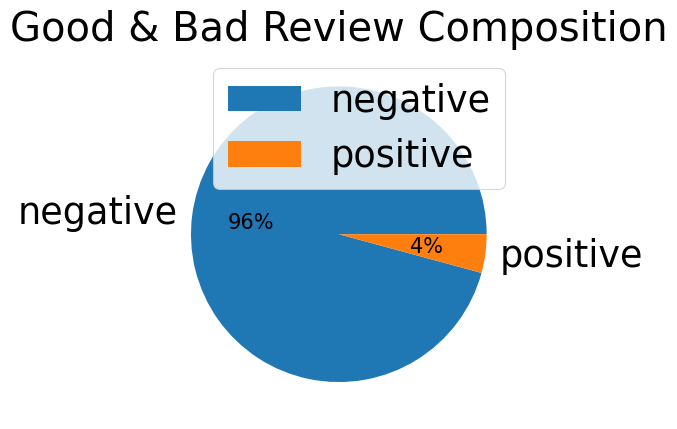

In [29]:
reviews_df.groupby('is_bad_review').size().plot(kind='pie',y="",autopct='%1.0f%%', title="Good & Bad Review Composition")
plt.legend()

In [30]:
p=df.groupby("Reviewer_Nationality")["Total_Number_of_Reviews_Reviewer_Has_Given"].sum().reset_index()
p=p.sort_values(by="Total_Number_of_Reviews_Reviewer_Has_Given" , ascending=False)
print(p.head(5))

           Reviewer_Nationality  Total_Number_of_Reviews_Reviewer_Has_Given
166             United Kingdom                                        70346
168   United States of America                                        19632
11                   Australia                                        14916
135               Saudi Arabia                                        10433
153                Switzerland                                         9596


In [31]:
print("Max no of reviews for a hotel", df['Total_Number_of_Reviews'].max())
df[df['Total_Number_of_Reviews'] == df['Total_Number_of_Reviews'].max()].head()

Max no of reviews for a hotel 16670


,Unnamed: 0,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review
35940,488439,904,2017-07-21,8.1,Hotel Da Vinci,Spain,The bad thing is that you arrive to the mane ...,80,16670,The parking is big and secure If you need to ...,24,16,5.8,"[' With a pet ', ' Family with young children ...",13
35941,488561,904,2017-05-29,8.1,Hotel Da Vinci,United Kingdom,No iron in rooms poor lighting no aircon duri...,31,16670,Free Breakfast staff very friendly Very big r...,12,1,8.3,"[' Group ', ' Double Room ', ' Stayed 6 nights...",66
35942,488565,904,2017-05-27,8.1,Hotel Da Vinci,United States of America,The hotel is in a residential area with no co...,63,16670,The rooms were nice with good beds and bath but,12,4,6.0,"[' Leisure trip ', ' Couple ', ' Superior Twin...",68
35943,488578,904,2017-05-15,8.1,Hotel Da Vinci,Germany,The day we checked in the receptionist Gloria...,95,16670,Although there is a free parking area at the ...,77,5,6.7,"[' Leisure trip ', ' Family with young childre...",80
35944,488591,904,2017-05-05,8.1,Hotel Da Vinci,Australia,The shower areas need updating but the rest o...,26,16670,This hotel is excellent value for money Free ...,83,8,9.6,"[' Leisure trip ', ' Family with young childre...",90


In [32]:
reviews_df['Length'] = reviews_df['review'].str.len()
reviews_df.head(10)

,review,is_bad_review,Length
0,I am so angry that i made this post available...,positive,1913
1,No Negative No real complaints the hotel was g...,negative,622
2,Rooms are nice but for elderly a bit difficul...,negative,301
3,My room was dirty and I was afraid to walk ba...,positive,1221
4,You When I booked with your company on line y...,negative,774
5,Backyard of the hotel is total mess shouldn t...,negative,186
6,Cleaner did not change our sheet and duvet ev...,positive,235
7,Apart from the price for the brekfast Everyth...,negative,157
8,Even though the pictures show very clean room...,negative,173
9,The aircondition makes so much noise and its ...,negative,312


In [33]:
word_count = reviews_df['review'][0].split()
print(f'Word count in a sample review: {len(word_count)}')

Word count in a sample review: 404


In [34]:
def word_count(review):
    review_list = review.split()
    return len(review_list)

In [35]:
reviews_df['Word_count'] = reviews_df['review'].apply(word_count)
reviews_df.head(10)

,review,is_bad_review,Length,Word_count
0,I am so angry that i made this post available...,positive,1913,404
1,No Negative No real complaints the hotel was g...,negative,622,105
2,Rooms are nice but for elderly a bit difficul...,negative,301,59
3,My room was dirty and I was afraid to walk ba...,positive,1221,232
4,You When I booked with your company on line y...,negative,774,144
5,Backyard of the hotel is total mess shouldn t...,negative,186,33
6,Cleaner did not change our sheet and duvet ev...,positive,235,47
7,Apart from the price for the brekfast Everyth...,negative,157,27
8,Even though the pictures show very clean room...,negative,173,34
9,The aircondition makes so much noise and its ...,negative,312,61


In [36]:
reviews_df['mean_word_length'] = reviews_df['review'].map(lambda rev: np.mean([len(word) for word in rev.split()]))
reviews_df.head(10)

,review,is_bad_review,Length,Word_count,mean_word_length
0,I am so angry that i made this post available...,positive,1913,404,3.730198
1,No Negative No real complaints the hotel was g...,negative,622,105,4.923810
2,Rooms are nice but for elderly a bit difficul...,negative,301,59,4.067797
3,My room was dirty and I was afraid to walk ba...,positive,1221,232,4.254310
4,You When I booked with your company on line y...,negative,774,144,4.361111
5,Backyard of the hotel is total mess shouldn t...,negative,186,33,4.575758
6,Cleaner did not change our sheet and duvet ev...,positive,235,47,3.957447
7,Apart from the price for the brekfast Everyth...,negative,157,27,4.777778
8,Even though the pictures show very clean room...,negative,173,34,4.088235
9,The aircondition makes so much noise and its ...,negative,312,61,4.081967


In [37]:
from nltk import tokenize
np.mean([len(sent) for sent in tokenize.sent_tokenize(reviews_df['review'][0])])

1912.0

In [38]:
reviews_df['mean_sent_length'] = reviews_df['review'].map(lambda rev: np.mean([len(sent) for sent in tokenize.sent_tokenize(rev)]))
reviews_df.head(10)

,review,is_bad_review,Length,Word_count,mean_word_length,mean_sent_length
0,I am so angry that i made this post available...,positive,1913,404,3.730198,1912.0
1,No Negative No real complaints the hotel was g...,negative,622,105,4.923810,621.0
2,Rooms are nice but for elderly a bit difficul...,negative,301,59,4.067797,300.0
3,My room was dirty and I was afraid to walk ba...,positive,1221,232,4.254310,1220.0
4,You When I booked with your company on line y...,negative,774,144,4.361111,773.0
5,Backyard of the hotel is total mess shouldn t...,negative,186,33,4.575758,185.0
6,Cleaner did not change our sheet and duvet ev...,positive,235,47,3.957447,234.0
7,Apart from the price for the brekfast Everyth...,negative,157,27,4.777778,156.0
8,Even though the pictures show very clean room...,negative,173,34,4.088235,173.0
9,The aircondition makes so much noise and its ...,negative,312,61,4.081967,311.0


In [39]:
def visualize(col):
    
    print()
    plt.subplot(1,2,1)
    sns.boxplot(y=reviews_df[col], hue=reviews_df['is_bad_review'])
    plt.ylabel(col, labelpad=25)
    
    plt.subplot(1,2,2)
    sns.kdeplot(y=reviews_df[col],hue=reviews_df['is_bad_review'])
    plt.legend(reviews_df['is_bad_review'].unique())
    plt.xlabel('')
    plt.ylabel('')
    
    plt.show()

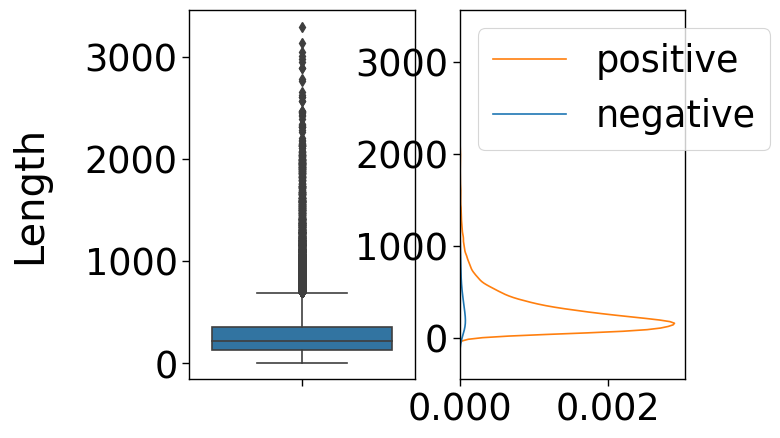

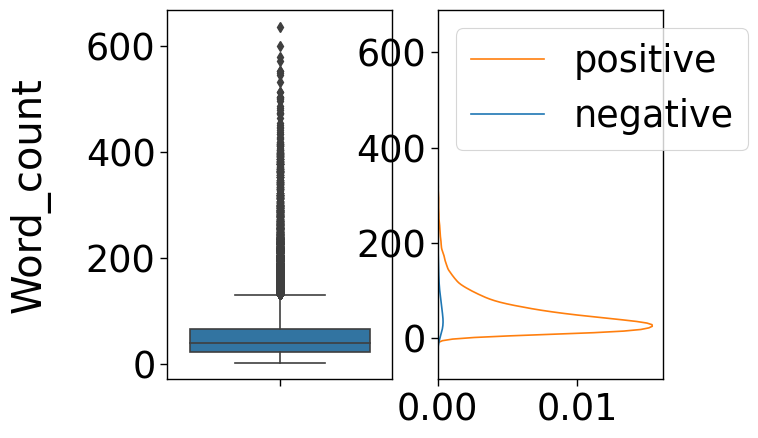

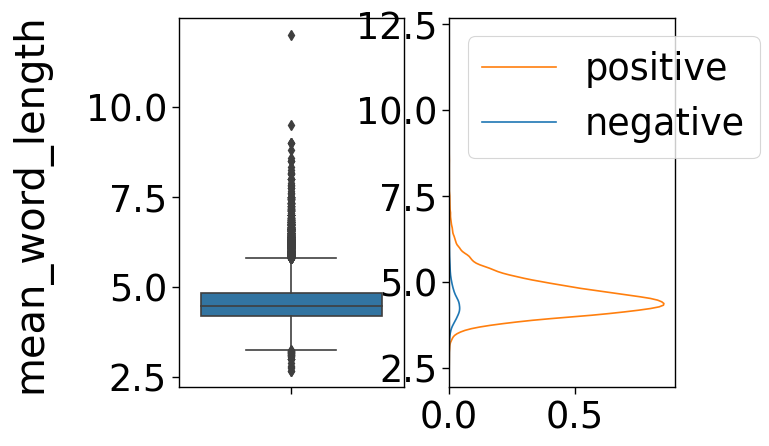

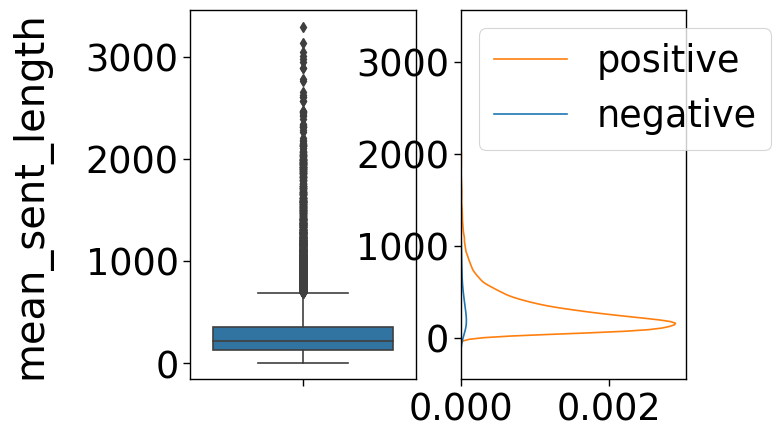

In [40]:
features = reviews_df.columns.tolist()[2:]
for feature in features:
    visualize( feature)

In [41]:
df = reviews_df.drop(features, axis=1)
df.head()

,review,is_bad_review
0,I am so angry that i made this post available...,positive
1,No Negative No real complaints the hotel was g...,negative
2,Rooms are nice but for elderly a bit difficul...,negative
3,My room was dirty and I was afraid to walk ba...,positive
4,You When I booked with your company on line y...,negative


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37346 entries, 0 to 37345
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   review         37346 non-null  object
 1   is_bad_review  37346 non-null  object
dtypes: object(2)
memory usage: 583.7+ KB


In [43]:
from tqdm import trange
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
def clean(review):
    
    review = review.lower()
    review = re.sub('[^a-z A-Z 0-9-]+', '', review)
    review = " ".join([word for word in review.split() if word not in stopwords.words('english')])
    
    return review

In [44]:
#df['review'] = df['review'].apply(clean)
#df.head(10)

In [45]:
def corpus(text):
    text_list = text.split()
    return text_list

In [46]:
df['Review_lists'] = df['review'].apply(corpus)
df.head(10)

,review,is_bad_review,Review_lists
0,I am so angry that i made this post available...,positive,"[I, am, so, angry, that, i, made, this, post, ..."
1,No Negative No real complaints the hotel was g...,negative,"[No, Negative, No, real, complaints, the, hote..."
2,Rooms are nice but for elderly a bit difficul...,negative,"[Rooms, are, nice, but, for, elderly, a, bit, ..."
3,My room was dirty and I was afraid to walk ba...,positive,"[My, room, was, dirty, and, I, was, afraid, to..."
4,You When I booked with your company on line y...,negative,"[You, When, I, booked, with, your, company, on..."
5,Backyard of the hotel is total mess shouldn t...,negative,"[Backyard, of, the, hotel, is, total, mess, sh..."
6,Cleaner did not change our sheet and duvet ev...,positive,"[Cleaner, did, not, change, our, sheet, and, d..."
7,Apart from the price for the brekfast Everyth...,negative,"[Apart, from, the, price, for, the, brekfast, ..."
8,Even though the pictures show very clean room...,negative,"[Even, though, the, pictures, show, very, clea..."
9,The aircondition makes so much noise and its ...,negative,"[The, aircondition, makes, so, much, noise, an..."


In [47]:
corpus = []
for i in trange(df.shape[0], ncols=150, nrows=10, colour='green', smoothing=0.8):
    corpus += df['Review_lists'][i]
len(corpus)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 37346/37346 [00:00<00:00, 56079.18it/s]


1993623

In [48]:
mostCommon = Counter(corpus).most_common(10)
mostCommon

[('the', 94438),
 ('and', 69012),
 ('was', 51683),
 ('to', 49007),
 ('a', 43989),
 ('in', 32591),
 ('The', 30857),
 ('room', 30517),
 ('of', 27448),
 ('for', 23608)]

In [49]:
words = []
freq = []
for word, count in mostCommon:
    words.append(word)
    freq.append(count)

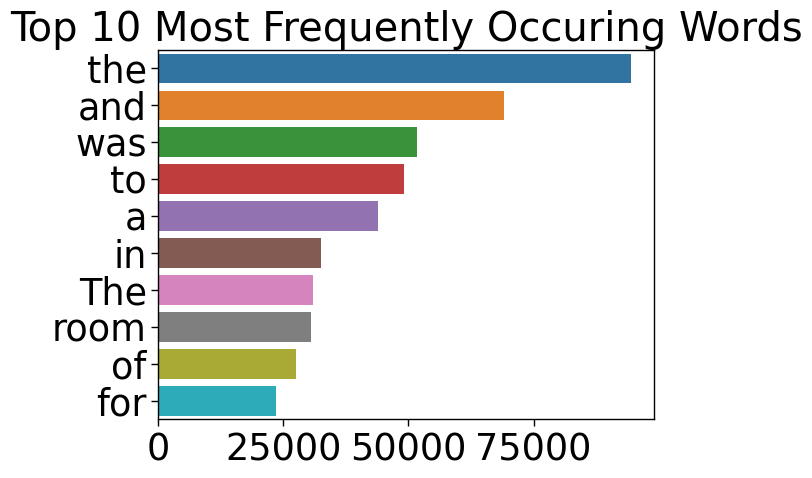

In [50]:
sns.barplot(x=freq, y=words)
plt.title('Top 10 Most Frequently Occuring Words')
plt.show()

# MODELS :

In [51]:
df = pd.read_csv(r'C:\Users\Srinithi\Downloads\ml project\hp_s.csv')

In [52]:
df["Negative_Review"] = df["Negative_Review"].apply(lambda x: str(x).replace("No Negative", " _ "))
df["Positive_Review"] = df["Positive_Review"].apply(lambda x: str(x).replace("No Positive", " _ "))
df["review"] = df["Negative_Review"] + " " + df["Positive_Review"]

In [53]:
neg_percent=df['Review_Total_Negative_Word_Counts']/df["review"].apply(lambda n: len(n.split()))*100
pos_percent=df['Review_Total_Positive_Word_Counts']/df["review"].apply(lambda n: len(n.split()))*100
df['Ratio_count']=pos_percent/neg_percent
#df['Ratio_count']=df['Review_Total_Negative_Word_Counts']/df['Review_Total_Positive_Word_Counts']
df.head()

,Unnamed: 0,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,review,Ratio_count
0,0,194,2017-08-03,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0,I am so angry that i made this post available...,0.027708
1,1,194,2017-08-03,7.7,Hotel Arena,Ireland,_,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0,_ No real complaints the hotel was great gr...,inf
2,2,194,2017-07-31,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3,Rooms are nice but for elderly a bit difficul...,0.500000
3,3,194,2017-07-31,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3,My room was dirty and I was afraid to walk ba...,0.123810
4,4,194,2017-07-24,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10,You When I booked with your company on line y...,0.057143


In [54]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

In [55]:
df["is_bad_review"] = df['Reviewer_Score'].apply(lambda x: 1 if x < 5 else 0)

In [56]:
grp=df.groupby("is_bad_review")
grp.count()

,Unnamed: 0,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,review,Ratio_count
is_bad_review,,,,,,,,,,,,,,,,,
0,35769,35769,35769,35769,35769,35769,35769,35769,35769,35769,35769,35769,35769,35769,35769,35769,35769
1,1576,1576,1576,1576,1576,1576,1576,1576,1576,1576,1576,1576,1576,1576,1576,1576,1576


In [57]:
df1=df[df["is_bad_review"]==1]

In [58]:
df2=df[df["is_bad_review"]==0]

In [59]:
df2=df2.sample(n=1500,replace=False)

In [60]:
df1=df1.sample(n=1500,replace=False)

In [61]:
df1=df1.append(df2)

C:\Users\Srinithi\AppData\Local\Temp\ipykernel_18632\3591658828.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1=df1.append(df2)


In [62]:
df1.shape[0]

3000

In [63]:
df=df1

In [64]:
df = df.sample(frac = 1)
df.head(10)

,Unnamed: 0,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,review,Ratio_count,is_bad_review
11836,112988,1485,2015-09-14,7.5,Hilton London Metropole,United Kingdom,Staff attitude not good Rooms dirty Linen old...,25,6977,The location is ok and fantastic,7,1,4.6,"[' Business trip ', ' Solo traveler ', ' Twin ...",689,Staff attitude not good Rooms dirty Linen old...,0.280000,1
19154,227155,471,2016-07-24,7.9,Best Western Palm Hotel,France,Far away from metro Not in center of London m...,82,2037,Bus in front off the hotel Getting a quiet ro...,16,4,4.2,"[' Travelers with friends ', ' Standard Triple...",375,Far away from metro Not in center of London m...,0.195122,1
3781,24727,541,2016-07-31,8.0,Doubletree by Hilton London Kensington,United States of America,In a two week trip through 3 countries this w...,385,2367,Location was fantastic close to a tube statio...,18,5,4.2,"[' Leisure trip ', ' Family with older childre...",368,In a two week trip through 3 countries this w...,0.046753,1
7716,62830,50,2017-03-07,9.1,Idol Hotel,Russia,Tiny room needs renovation shower cabin in ro...,14,560,Very good breakfast quiet room,6,8,5.0,"[' Leisure trip ', ' Couple ', ' Double Room L...",149,Tiny room needs renovation shower cabin in ro...,0.428571,0
7628,62357,75,2015-08-17,8.8,Le Tourville Eiffel,United States of America,The spa bath tub was not as clean as I would ...,15,545,The staff was incredibly helpful The room was...,27,8,9.6,"[' Leisure trip ', ' Family with older childre...",717,The spa bath tub was not as clean as I would ...,1.800000,0
17353,195756,371,2016-08-28,7.3,The Premier Notting Hill,United Kingdom,incredible small rooms even for London staff ...,65,2215,location is pretty good bathrooms are new,8,1,3.8,"[' Business trip ', ' Solo traveler ', ' Delux...",340,incredible small rooms even for London staff ...,0.123077,1
18740,221023,74,2016-05-25,7.2,Amarante Beau Manoir,Kuwait,very small rooms old furniture tird bed is ve...,18,759,location staff ask for portable wifi,7,2,4.2,"[' Leisure trip ', ' Family with older childre...",435,very small rooms old furniture tird bed is ve...,0.388889,1
23240,284977,434,2017-05-04,8.6,Catalonia Plaza Catalunya,Malaysia,The hotel s temperature control cannot be adj...,114,4153,Very close to Catalunya Square of Barcelona a...,20,26,5.8,"[' Leisure trip ', ' Family with young childre...",91,The hotel s temperature control cannot be adj...,0.175439,0
26189,330563,343,2016-09-30,8.4,Avenida Palace,United Kingdom,The quality of the rooms was not what I expec...,15,3222,Great location pity about the hotel,7,22,4.6,"[' Business trip ', ' Couple ', ' Double Room ...",307,The quality of the rooms was not what I expec...,0.466667,1
20050,245436,201,2015-09-21,7.5,Holiday Inn Paris Gare Montparnasse,Switzerland,you can hear all through the door the cling l...,30,3228,my room was faced to the garden cemetery very...,11,2,4.2,"[' Business trip ', ' Solo traveler ', ' Twin ...",682,you can hear all through the door the cling l...,0.366667,1


In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

In [66]:
'''
import nltk
from nltk.corpus import stopwords
import nltk as nlp
import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
text_list = []
nltk.download('omw-1.4')
for text in df.review:
    text = re.sub("[^a-zA-Z]", " ", str(text)) #remove numbers, special characters and punctuations
    text = nltk.word_tokenize(text) #tokenize text
    text = [word for word in text if not word in set(stopwords.words("english"))] #remove stopwords
    lemma = nlp.WordNetLemmatizer()
    text = [lemma.lemmatize(word) for word in text] #lemmaize text
    text = " ".join(text)
    text = text.replace('  ',' ')
    text_list.append(text)
'''

'\nimport nltk\nfrom nltk.corpus import stopwords\nimport nltk as nlp\nimport nltk\nfrom nltk.tokenize import word_tokenize\nnltk.download(\'stopwords\')\nnltk.download(\'punkt\')\nnltk.download(\'wordnet\')\ntext_list = []\nnltk.download(\'omw-1.4\')\nfor text in df.review:\n    text = re.sub("[^a-zA-Z]", " ", str(text)) #remove numbers, special characters and punctuations\n    text = nltk.word_tokenize(text) #tokenize text\n    text = [word for word in text if not word in set(stopwords.words("english"))] #remove stopwords\n    lemma = nlp.WordNetLemmatizer()\n    text = [lemma.lemmatize(word) for word in text] #lemmaize text\n    text = " ".join(text)\n    text = text.replace(\'  \',\' \')\n    text_list.append(text)\n'

In [67]:
'''
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
rating_list=[]
for text in text_list:
    sid = SentimentIntensityAnalyzer()
    ss = sid.polarity_scores(text)['compound'] 
    rating_list.append(ss)
'''

"\nfrom nltk.sentiment import SentimentIntensityAnalyzer\nnltk.download('vader_lexicon')\nrating_list=[]\nfor text in text_list:\n    sid = SentimentIntensityAnalyzer()\n    ss = sid.polarity_scores(text)['compound'] \n    rating_list.append(ss)\n"

In [68]:
'''
df['ratings']=rating_list
df["review"] = text_list 
'''

'\ndf[\'ratings\']=rating_list\ndf["review"] = text_list \n'

# Linear Regression

In [ ]:
df=pd.read_csv(r"C:\Users\Srinithi\Downloads\ml project\hp_s.csv")

In [69]:
#y = df['Reviewer_Score']
#X = df['ratings']
y = df['Reviewer_Score']
X = df[['Ratio_count']]

In [70]:
#Setting numerical values  

df.fillna(0, inplace=True)
X = X.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

numerical_columns = ['Ratio_count']

from sklearn.preprocessing import MinMaxScaler
scaler =    MinMaxScaler()
data_scaled = pd.DataFrame(X)
data_scaled[numerical_columns] = scaler.fit_transform(data_scaled[numerical_columns])
data_scaled.head()

,Ratio_count
0,0.004477
1,0.003080
2,0.000640
3,0.006921
4,0.029480


In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_scaled, y, test_size=0.3, random_state=10)

#X_train, X_test, y_train, y_test = train_test_split(df.select_dtypes(include='number'), y, test_size=0.3, random_state=10)

In [72]:
df.fillna(0, inplace=True)
X_train = X_train.replace((np.inf, -np.inf, np.nan), 10).reset_index(drop=True)
y_train= y_train.replace((np.inf, -np.inf, np.nan), 10).reset_index(drop=True)


In [73]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

C:\Users\Srinithi\AppData\Local\Temp\ipykernel_18632\4258520363.py:5: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.bar(ind, y_test[:15], width, label='Actual reviewer score')


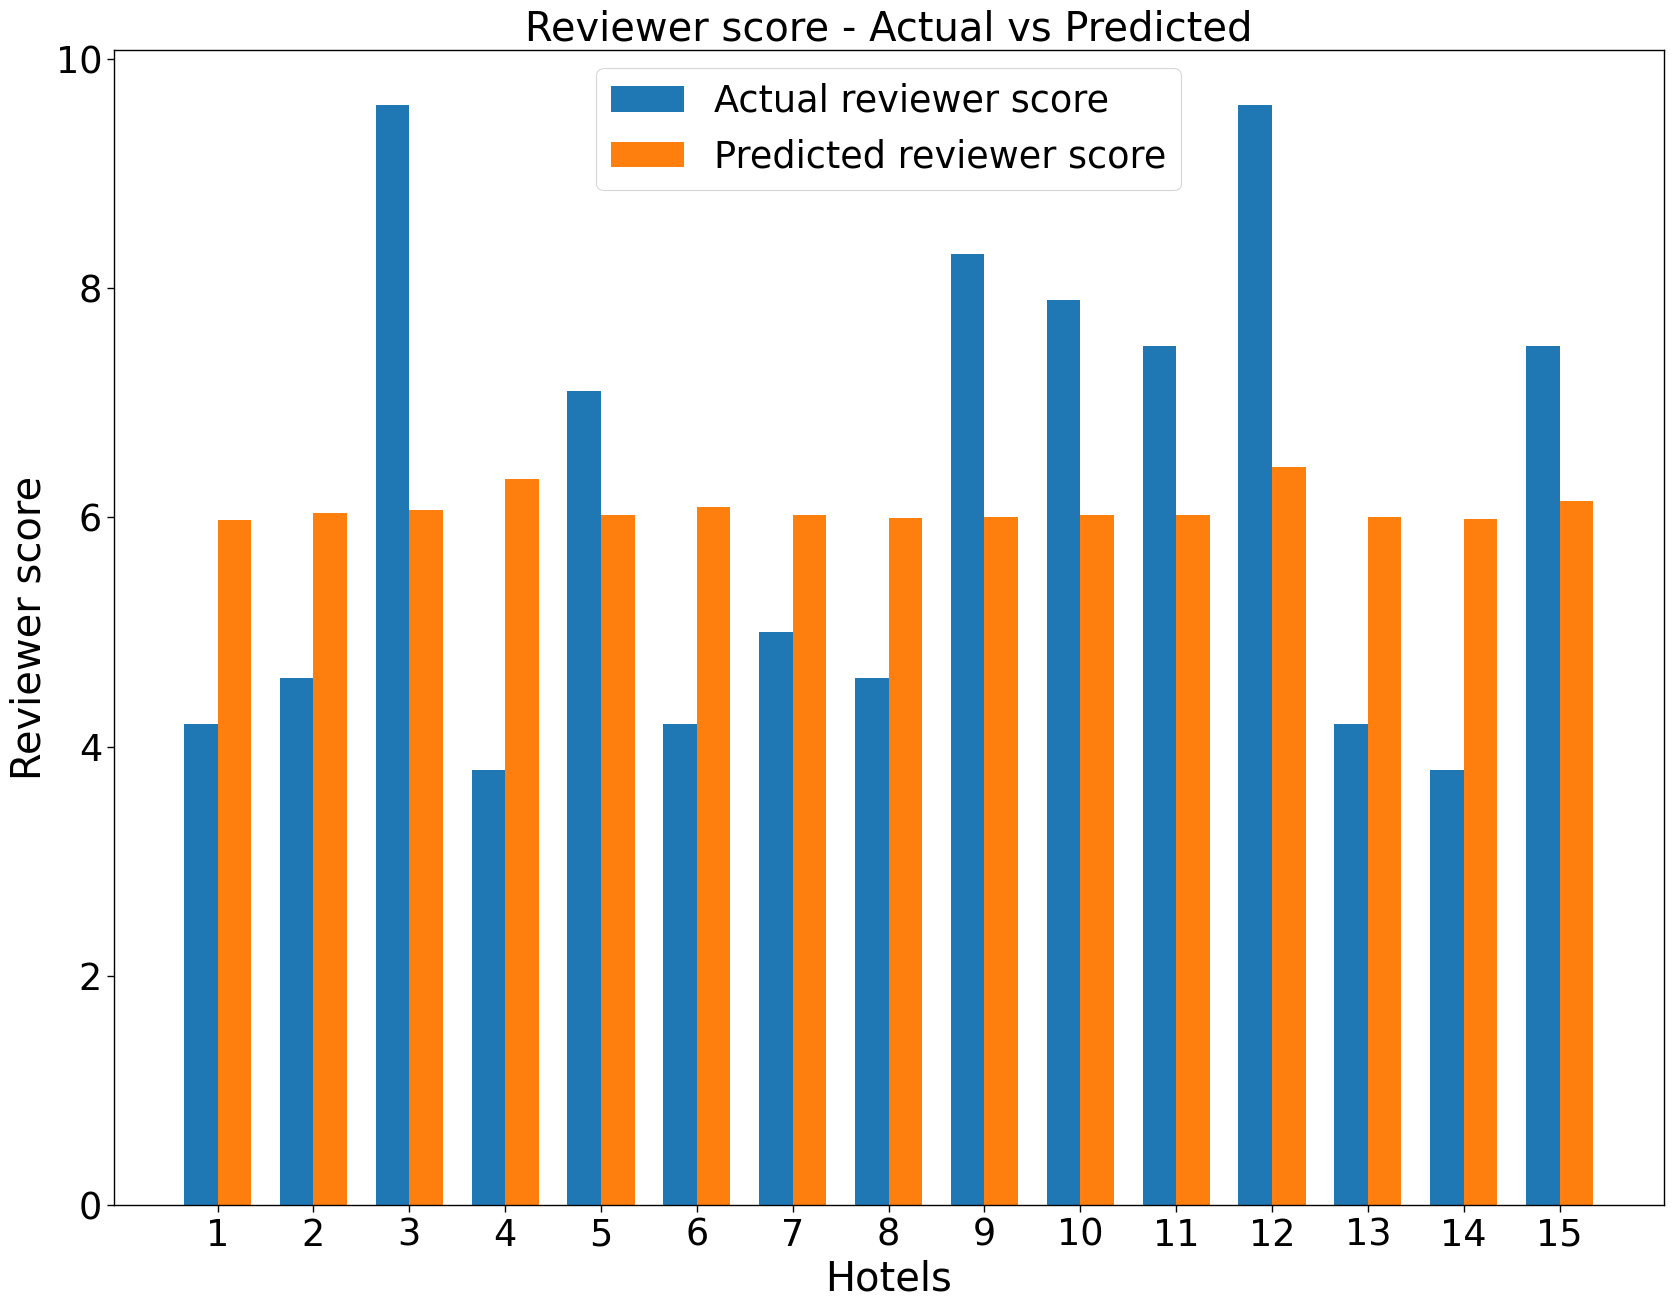

In [74]:
import matplotlib.pyplot as plt
ind = np.arange(15)
width = 0.35
plt.figure(figsize=(20, 15))
plt.bar(ind, y_test[:15], width, label='Actual reviewer score')
plt.bar(ind+width, y_pred[:15], width, label='Predicted reviewer score')

plt.xticks(ind+width/2, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
plt.legend(loc='best')

plt.xlabel("Hotels")
plt.ylabel("Reviewer score")
plt.title("Reviewer score - Actual vs Predicted")

plt.show()

In [75]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

Mean absolute error = 2.16
Mean squared error = 5.58
Median absolute error = 2.16
Explain variance score = 0.03
R2 score = 0.03


# Logistic regression

In [359]:
from sklearn.linear_model import LogisticRegression

In [374]:
df["is_bad_review"] = df['Reviewer_Score'].apply(lambda x: 1 if x < 5 else 0)


In [376]:
X=df['Reviewer_Score']
y=df['is_bad_review']

In [378]:
df.groupby(['is_bad_review']).size()

is_bad_review
0    1500
1    1500
dtype: int64

In [379]:
modelLogistic = LogisticRegression()
modelLogistic.fit(X_train,y_train)
print("The intercept b0= ", modelLogistic.intercept_)
print("The coefficient b1= ", modelLogistic.coef_)

The intercept b0=  [1.9056024]
The coefficient b1=  [[ 4.72625669 -5.27008202 -3.79557761]]


In [380]:
y_pred= modelLogistic.predict(X_test)

In [381]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[293  82]
 [121 254]]


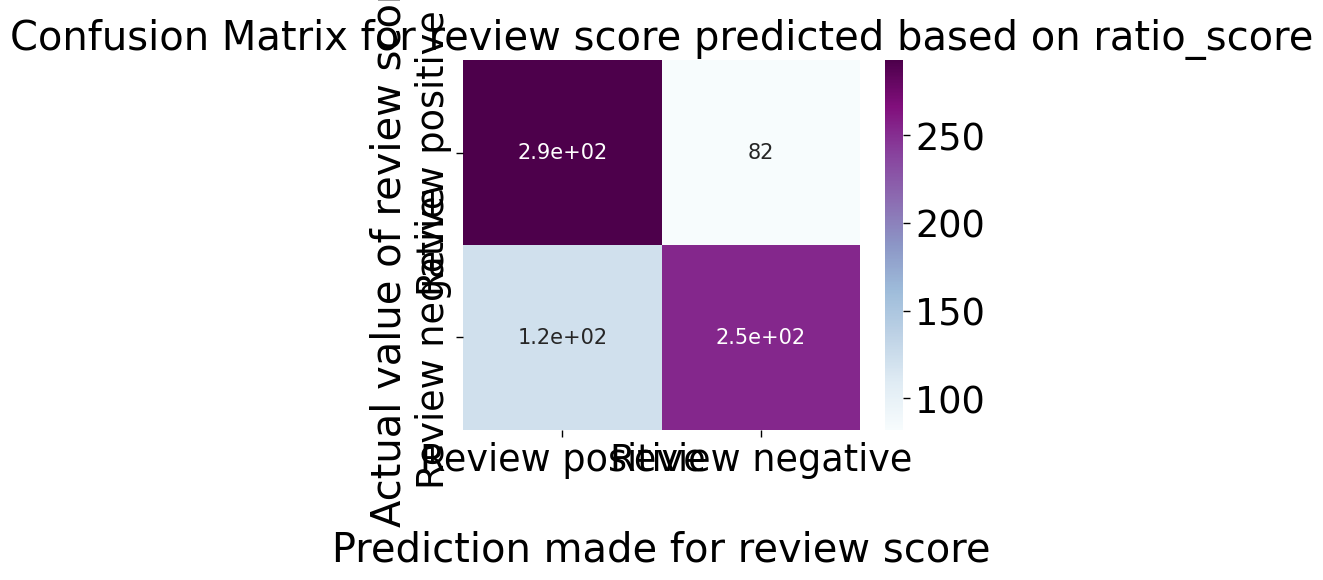

<Figure size 10000x10000 with 0 Axes>

In [382]:
ax = sns.heatmap(confusion_matrix, annot=True, cmap='BuPu')
ax.set_title('Confusion Matrix for review score predicted based on ratio_score')
ax.set_xlabel('\nPrediction made for review score')
ax.set_ylabel('Actual value of review score')
ax.xaxis.set_ticklabels(['Review positive','Review negative'])
ax.yaxis.set_ticklabels(['Review positive','Review negative'])
plt.figure(figsize=(100, 100))

plt.show()

In [383]:
#Accuracy from confusion matrix
TP= confusion_matrix[1,1] #True positive
TN= confusion_matrix[0,0] #True negative
Total=len(y_test)
print("Accuracy from confusion matrix is ", (TN+TP)/Total)

Accuracy from confusion matrix is  0.7293333333333333


In [384]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error,r2_score,f1_score,precision_score,recall_score,fbeta_score
cr = classification_report(y_test,y_pred)
print('Classification Report-->\n')
print(cr)

Classification Report-->

              precision    recall  f1-score   support

           0       0.71      0.78      0.74       375
           1       0.76      0.68      0.71       375

    accuracy                           0.73       750
   macro avg       0.73      0.73      0.73       750
weighted avg       0.73      0.73      0.73       750



# RANDOM FOREST :

In [86]:
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [87]:
y=df['Reviewer_Score']
X=df['Ratio_count']
X_train, X_test, y_train, y_test = train_test_split(df.select_dtypes(include='number'), y, test_size=0.3, random_state=10)
X_train, X_test, y_train, y_test = train_test_split(df.select_dtypes(include='number'), y, test_size=0.2, random_state=10)

In [88]:
model_1 = LinearRegression()
model_2 = xgb.XGBRegressor()
model_3 = RandomForestRegressor()
 

model_1.fit(X_train, y_train)
model_2.fit(X_train, y_train)
model_3.fit(X_train, y_train)
 

pred_1 = model_1.predict(X_test)
pred_2 = model_2.predict(X_test)
pred_3 = model_3.predict(X_test)
 
pred_final = (pred_1+pred_2+pred_3)/3.0

C:\Users\Srinithi\AppData\Local\Temp\ipykernel_18632\1302255607.py:5: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.bar(ind, y_test[:15], width, label='Actual reviewer score')


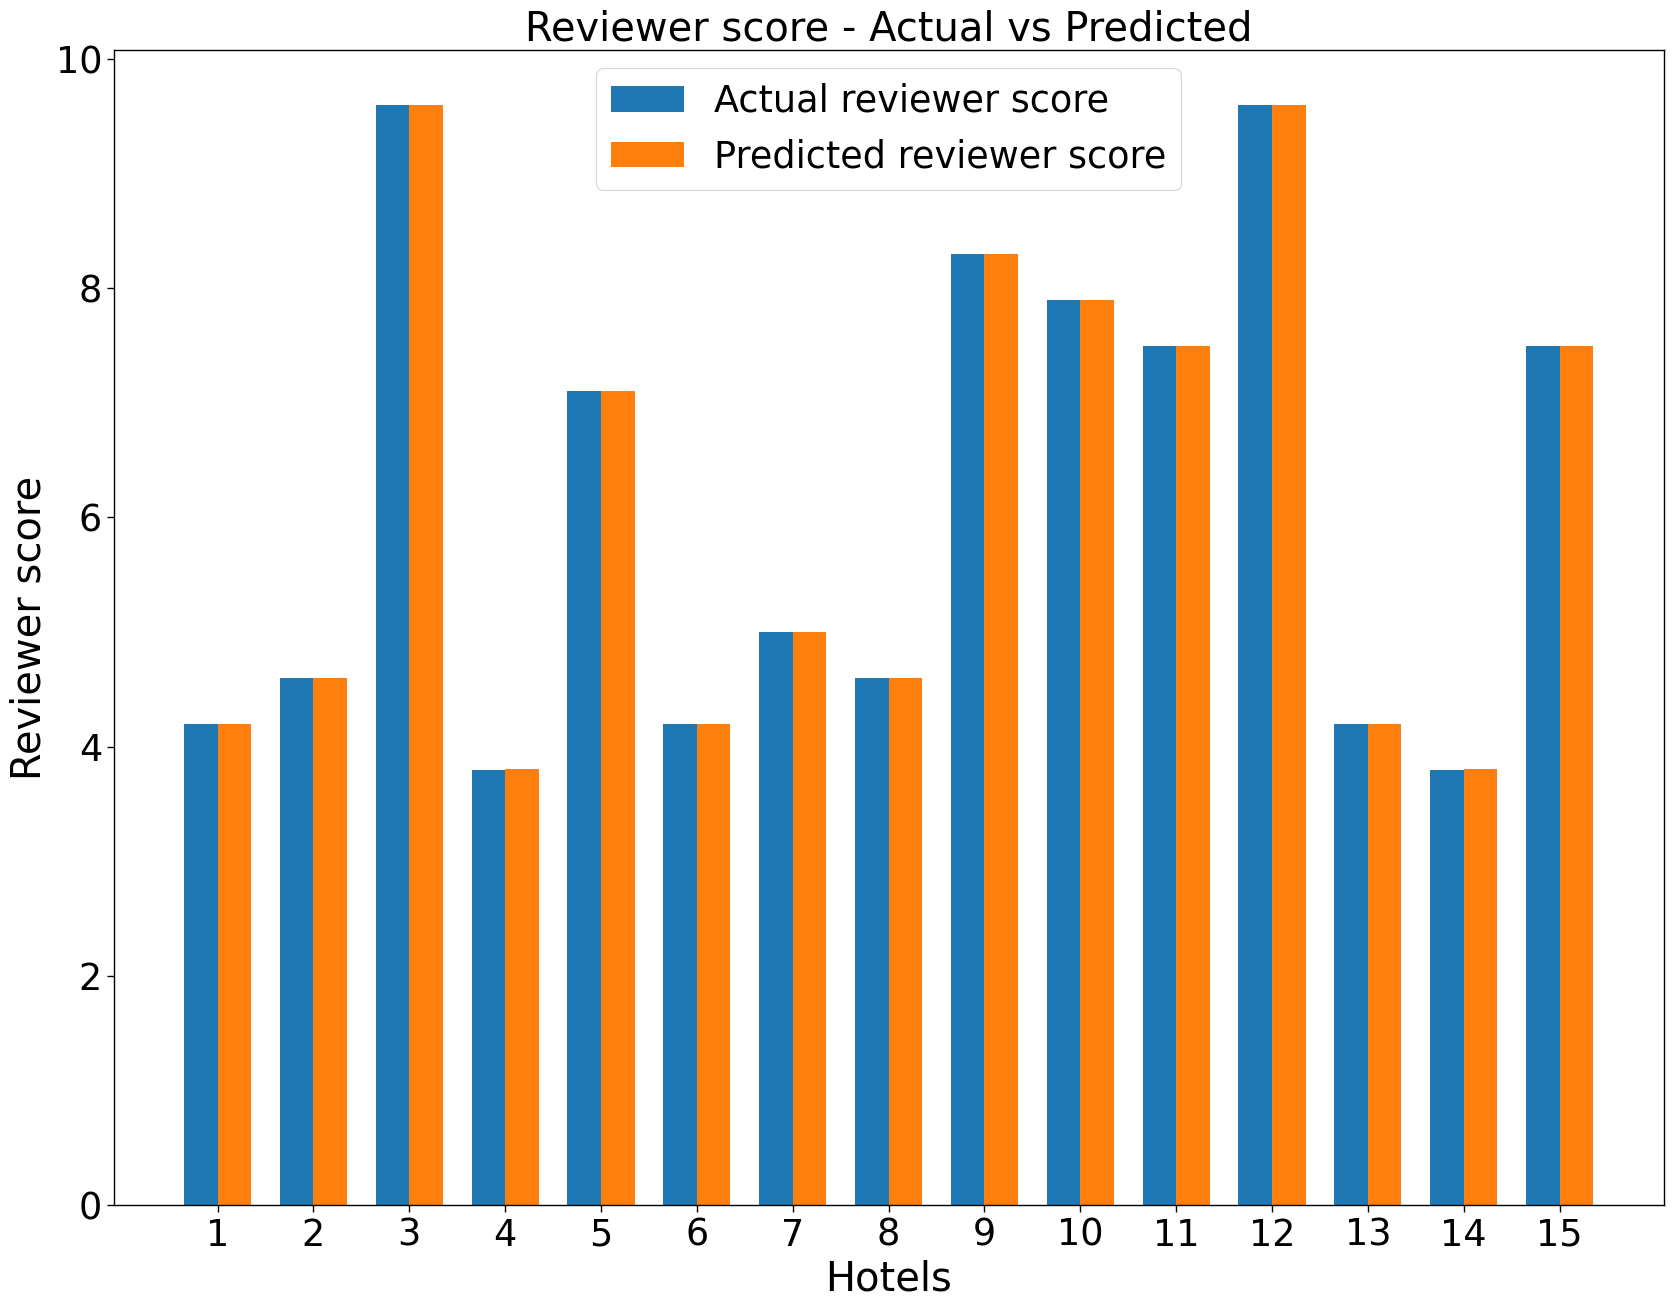

In [89]:
import matplotlib.pyplot as plt
ind = np.arange(15)
width = 0.35
plt.figure(figsize=(20, 15))
plt.bar(ind, y_test[:15], width, label='Actual reviewer score')
plt.bar(ind+width, pred_final[:15], width, label='Predicted reviewer score')

plt.xticks(ind+width/2, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
plt.legend(loc='best')

plt.xlabel("Hotels")
plt.ylabel("Reviewer score")
plt.title("Reviewer score - Actual vs Predicted")

plt.show()

In [90]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, pred_final), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, pred_final), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred_final), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred_final), 2)) 
print("R2 score =", round(sm.r2_score(y_test, pred_final), 2))

Mean absolute error = 0.0
Mean squared error = 0.0
Median absolute error = 0.0
Explain variance score = 1.0
R2 score = 1.0


# Decision Trees :

In [97]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree, export_text, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_blobs, load_breast_cancer
from sklearn.impute import SimpleImputer
from sklearn.datasets import fetch_olivetti_faces
from sklearn.ensemble import ExtraTreesRegressor

import graphviz

In [98]:
df2 = df[['Additional_Number_of_Scoring', 'Average_Score', 'Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews', 'Review_Total_Positive_Word_Counts', 'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score']]

In [99]:
X_train, X_test, y_train, y_test = train_test_split(df2.iloc[:,:-1],df2.iloc[:,-1],test_size=0.3,random_state=0)

In [100]:
reg= ExtraTreesRegressor()

In [101]:

reg.fit(X_train,y_train)

ExtraTreesRegressor()

In [102]:
reg.feature_importances_

array([0.09725095, 0.21384654, 0.24617804, 0.09814607, 0.2387864 ,
       0.10579201])

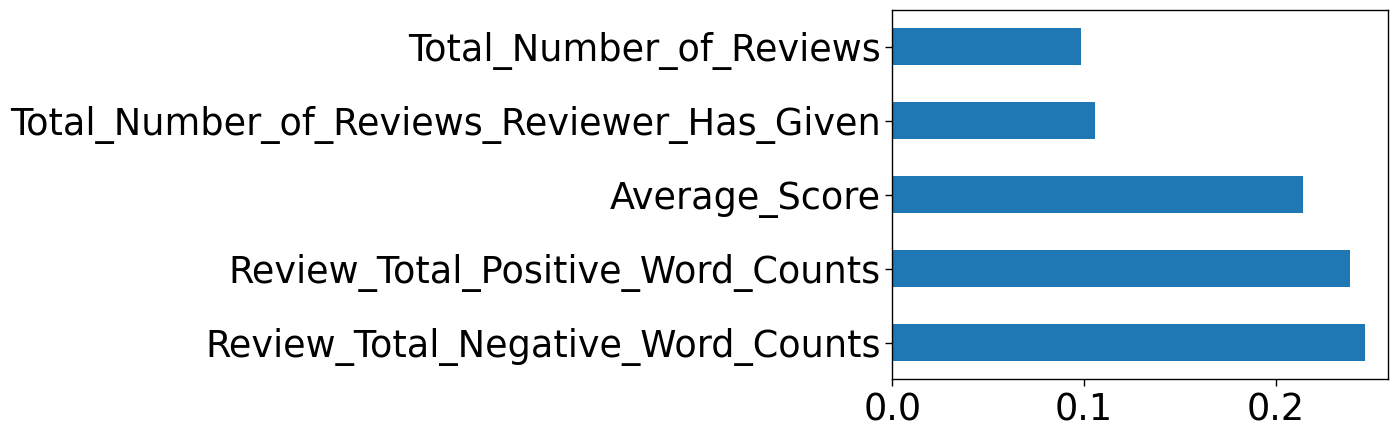

In [103]:
feat_importances = pd.Series(reg.feature_importances_, index=X_train.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [104]:
df2 = df[['Average_Score', 'Review_Total_Negative_Word_Counts', 'Review_Total_Positive_Word_Counts', 'Reviewer_Score']]

<AxesSubplot: >

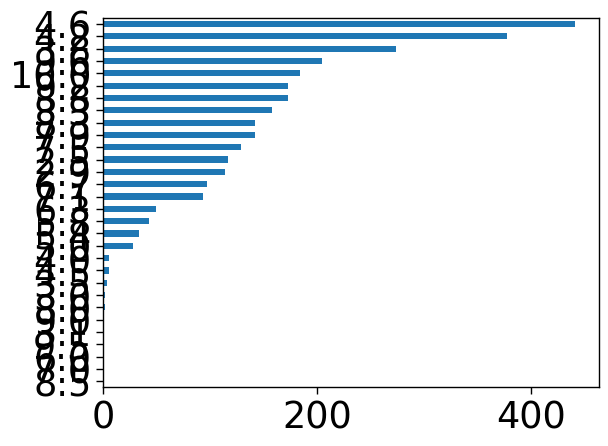

In [105]:
df2['Reviewer_Score'].value_counts().sort_values().plot(kind = 'barh')

In [186]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2.iloc[:,:-1], df2.iloc[:,-1], test_size=0.3, random_state=0)

In [187]:
y_test  = round(y_test).astype(int)
y_train = round(y_train).astype(int)

In [188]:
from sklearn.tree import DecisionTreeRegressor
reg_decision_model=DecisionTreeRegressor()
# fit independent varaibles to the dependent variables
reg_decision_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [189]:
# without hyperparameter tuning 
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE: 2.176111111111111
MSE: 8.44824074074074
RMSE: 2.906585753206112


In [112]:
'''
text_representation = export_text(clf)
print(text_representation)'''

'\ntext_representation = export_text(clf)\nprint(text_representation)'

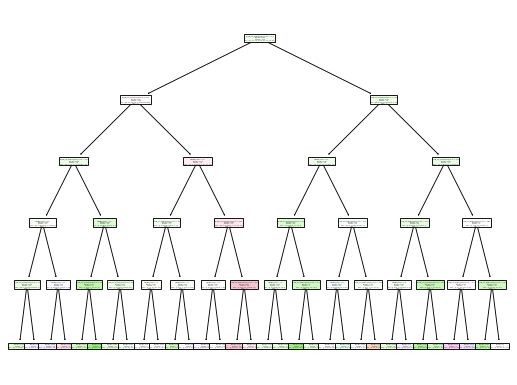

In [113]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plot_tree(clf, filled=True, 
            feature_names = ['Average_Score',
       'Review_Total_Negative_Word_Counts',
       'Review_Total_Positive_Word_Counts'],
            class_names = ['2','3','4','5','6','7','8','9','10']);

# SVM :

In [264]:
df2 = df[['Average_Score', 'Review_Total_Negative_Word_Counts', 'Review_Total_Positive_Word_Counts', 'Reviewer_Score']][:1000]

In [265]:
X = df2.drop(['Reviewer_Score'], axis=1)
y = df2['Reviewer_Score']

In [266]:
y = y.apply(lambda x: 1 if x < 5 else 0)

In [267]:
df2.shape[0]

1000

In [268]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [269]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [270]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

C:\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


ValueError: X has 2 features, but SVC is expecting 3 features as input.

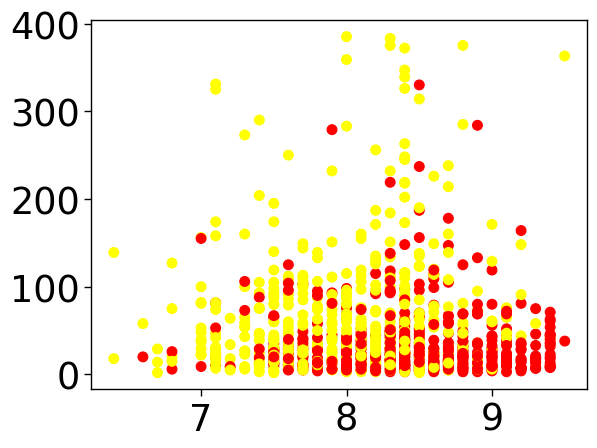

In [271]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1] , c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

# KNN:

In [288]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 

In [289]:
df2 = df[['Review_Total_Negative_Word_Counts', 'Review_Total_Positive_Word_Counts', 'Reviewer_Score']].sample(2500)

In [290]:
X = df2.drop(['Reviewer_Score'], axis=1)
y = df2['Reviewer_Score']

In [291]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [292]:
knn = KNeighborsRegressor(n_neighbors=25)  
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=25)

In [293]:
pred=knn.predict(X_test) #make prediction on test set
error = np.sqrt(mean_squared_error(y_test,pred)) #calculate rmse
print('RMSE value = ' , 'is:', error)

RMSE value =  is: 2.008393156730026


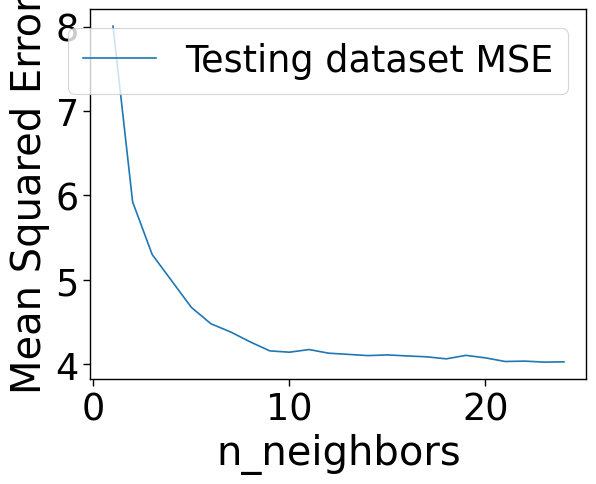

In [294]:
neighbors = np.arange(1, 25)
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred=knn.predict(X_test)
      
    # Compute training and test data accuracy
    test_accuracy[i] = mean_squared_error(pred, y_test)
  
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset MSE')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Mean Squared Error')
plt.show()

# K- Means Clustering :

In [295]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [296]:
df2 = df[['Review_Total_Negative_Word_Counts', 'Review_Total_Positive_Word_Counts', 'Reviewer_Score']][0:2000]

In [297]:
X = df2.drop(['Reviewer_Score'], axis=1)
y = df2['Reviewer_Score']
y = y.apply(lambda x: 1 if x < 7 else 0)

In [298]:
'''
y = round(y).astype(int)
y.value_counts()
'''

'\ny = round(y).astype(int)\ny.value_counts()\n'

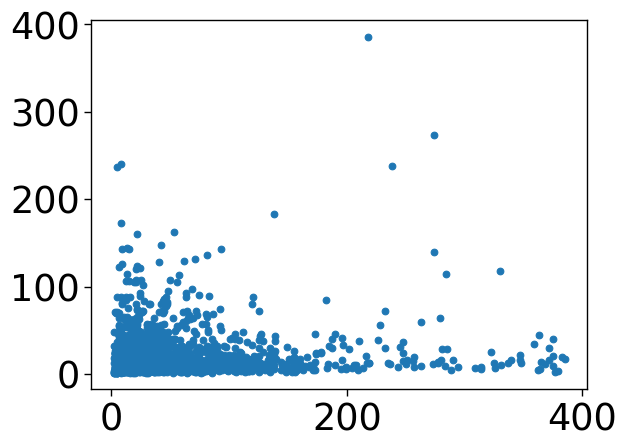

In [299]:
plt.scatter(X.iloc[:,0], X.iloc[:,1])

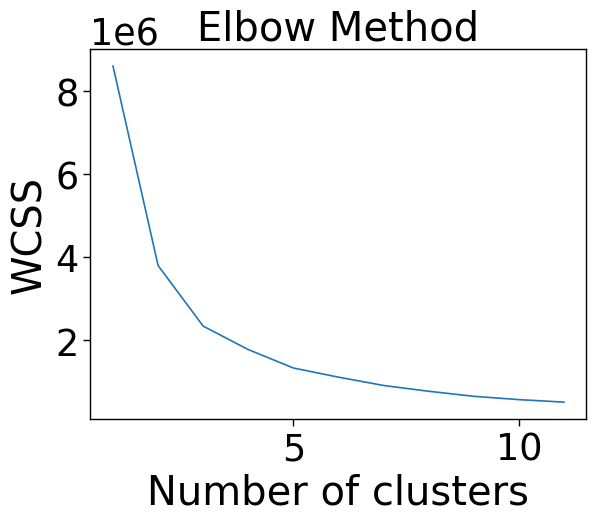

In [300]:
wcss = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 12), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

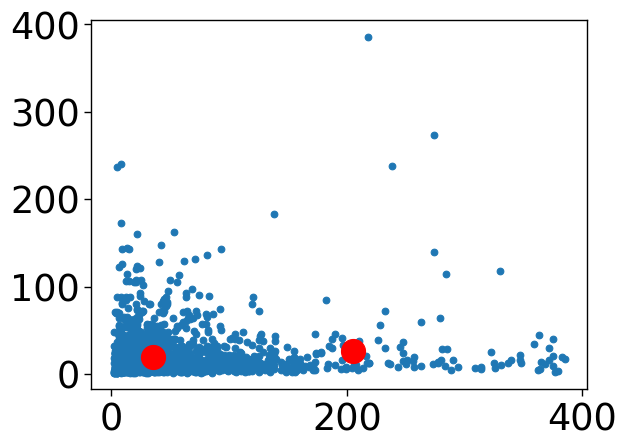

In [301]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X.iloc[:,0], X.iloc[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

In [302]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(pred_y, y)
print("Entropy based Decision Tree classifier achieves {}% accuracy on the car evaluation dataset".format(acc * 100))

Entropy based Decision Tree classifier achieves 49.3% accuracy on the car evaluation dataset


In [303]:
(pred_y == y).value_counts()

False    1014
True      986
Name: Reviewer_Score, dtype: int64

# Perceptron MLP :

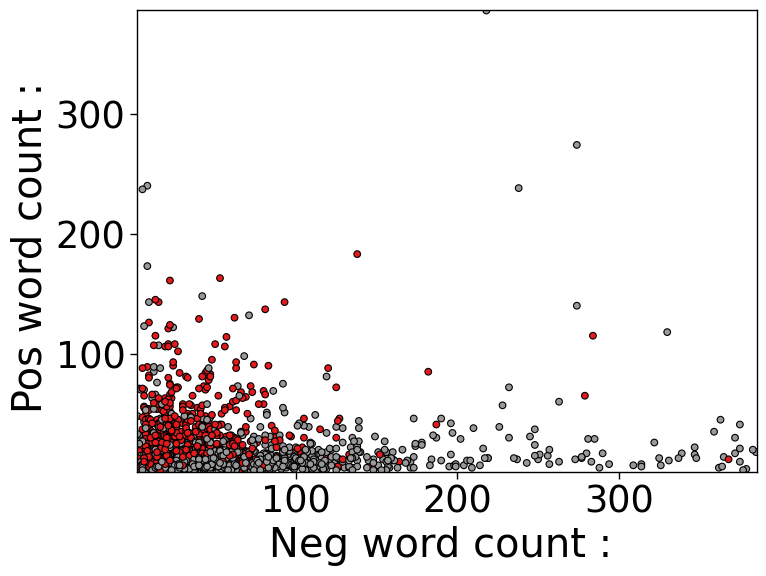

In [304]:
df2 = df[['Review_Total_Negative_Word_Counts', 'Review_Total_Positive_Word_Counts', 'Reviewer_Score']][0:2000]
X = df2.drop(['Reviewer_Score'], axis=1)
y = df2['Reviewer_Score']
y = y.apply(lambda x: 1 if x < 7 else -1)

#y[np.where(y == 0)] = -1

x_min, x_max = X.iloc[:, 0].min() - .5, X.iloc[:, 0].max() + .5
y_min, y_max = X.iloc[:, 1].min() - .5, X.iloc[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('Neg word count : ')
plt.ylabel('Pos word count : ')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

In [305]:

import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from tqdm import *
from collections import OrderedDict
import pdb


# Plot decision boundary
def plot_line(X, y, w, b):
    pos = X[np.where(y==1)]
    neg = X[np.where(y==-1)]
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    ax.set_xlim([x_min, x_max])
    ax.set_ylim([y_min, y_max])
    ax.scatter(*zip(*pos), color='b')
    ax.scatter(*zip(*neg), color='r')
    xmin, xmax = plt.xlim() 
    xx = np.linspace(xmin, xmax)
    a = -w[0] / w[1]
    yy = a * xx + b
    ax.plot(xx, yy, 'k-')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    plt.show()

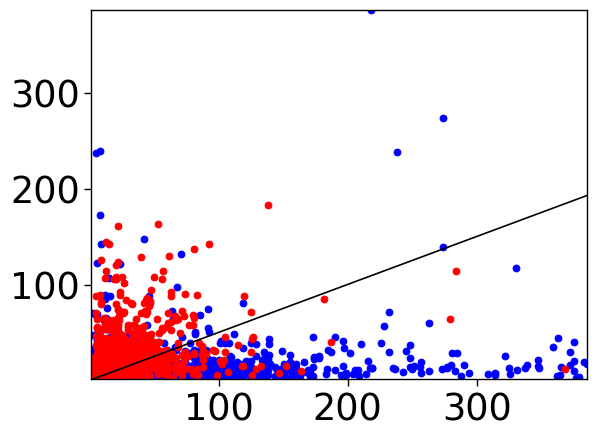

In [306]:
w = [-10, 20]
b = 0.5
plot_line(X.to_numpy(), y.to_numpy(), w, b)

# dimentionality reduction :

## PCA :

In [272]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [273]:
df.columns

Index(['Unnamed: 0', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'review', 'Ratio_count', 'is_bad_review'],
      dtype='object')

In [274]:
df2 = df[['Additional_Number_of_Scoring', 'Average_Score', 'Hotel_Name', 'Reviewer_Nationality', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'days_since_review' ]]

In [275]:
label_encoder = preprocessing.LabelEncoder()
df2['Reviewer_Nationality'] = label_encoder.fit_transform(df2["Reviewer_Nationality"])
df2['Reviewer_Nationality'].unique()

C:\Users\Srinithi\AppData\Local\Temp\ipykernel_18632\2009140678.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Reviewer_Nationality'] = label_encoder.fit_transform(df2["Reviewer_Nationality"])


array([113,  36, 114,  91,  62,  69, 104,  20, 112,   7,  93,  95, 111,
        17,  19,  47,  77,  59,  38,  22,  86,  53,  98,  87, 109,  51,
        54,  88,  78, 100,  90,  82,  29,  45,  11,  89,  50,  33,  41,
        56,  28,  84,  81,   0,  44,  99,  58,  55,   3,  70, 110,  64,
        52,  16,  79,  48, 103,  46,  25,  96,  14, 107,   8,  35,  80,
        30, 105,  65,  97,  73,  57,  49,   5,  26, 116,  15,  72,  66,
        71,   4, 108,  43,  85,  37,  27,  83,   6,  63,  39,  40,  75,
        94, 115,  34,  74,  92,  32,   2,  31,  68,  21,  23,   1,  12,
        67,   9, 102,  13, 101,  61,  10,  60,  24,  42, 117, 106,  76,
        18])

In [276]:
label_encoder = preprocessing.LabelEncoder()
df2['Hotel_Name'] = label_encoder.fit_transform(df2["Hotel_Name"])
df2['Hotel_Name'].unique()

C:\Users\Srinithi\AppData\Local\Temp\ipykernel_18632\2136297380.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Hotel_Name'] = label_encoder.fit_transform(df2["Hotel_Name"])


array([285,  84, 168, 433, 472, 767,  20, 116,  60, 307, 300,  85, 705,
       759, 681, 768, 213, 603, 812, 427, 152, 476, 408, 649, 741, 424,
       441, 756, 699, 762,  45, 505, 541, 578, 589, 102, 611, 187, 138,
       513, 314, 574, 143, 483, 614, 725, 155, 793,  51, 467, 530, 129,
       204, 628, 507, 668, 325, 763,   2, 261, 803, 637, 200, 570, 635,
       279, 160, 596, 568, 553,  98, 508, 704, 679, 100, 175, 722, 796,
       516, 303, 619, 234, 349, 131, 426, 650, 298, 532, 613, 227,  93,
       523, 753,  24, 135, 599, 730, 333, 331, 579, 164, 293, 702, 311,
       777,  89, 128, 586, 531, 784, 503, 397, 691, 584, 113, 322,  83,
       592, 170,   0, 484, 717, 478, 420, 546,  64, 758, 438, 667, 622,
       697, 714,   4, 272, 465, 166, 184, 488, 304,  63, 435,  43, 232,
       536, 286, 247, 559, 334,  82, 572, 414, 201, 212, 542, 792, 141,
       165, 489, 256, 299, 241, 290, 801, 569, 134,  96, 132, 587, 567,
        79, 117, 108, 208, 276, 566, 785,  66,  11, 139, 122, 28

In [277]:
X = df2.drop(['Reviewer_Score'], axis=1)
y = df2['Reviewer_Score']
y = y.apply(lambda x: 1 if x < 7 else 0)

In [278]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [279]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [280]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_


In [281]:
X_test.shape

(600, 2)

Text(0, 0.5, 'Second Principal Component')

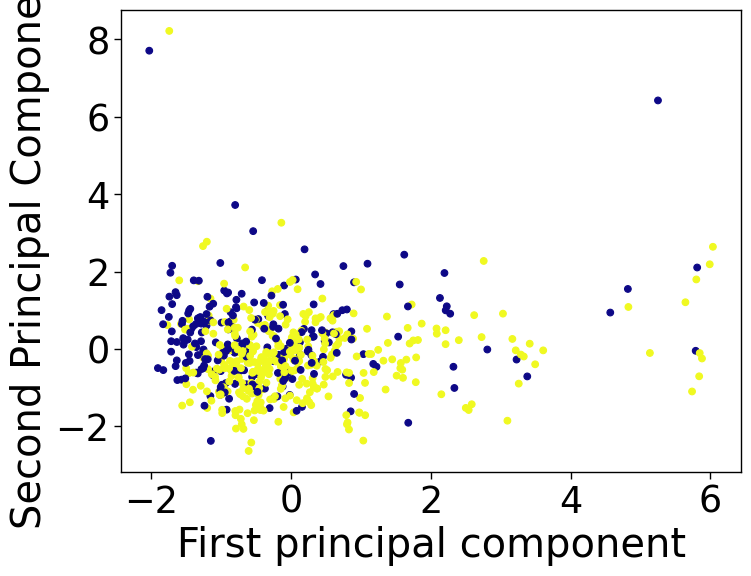

In [282]:
plt.figure(figsize=(8,6))
plt.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [283]:
pca.components_

array([[ 0.66479229, -0.27756346, -0.05172032,  0.03917827,  0.09511247,
         0.67217513, -0.07641307, -0.09667791, -0.02735775],
       [ 0.1377847 ,  0.481084  ,  0.3813325 ,  0.34184035,  0.20213483,
         0.08073458,  0.56342095, -0.08853396, -0.33859454]])

<AxesSubplot: >

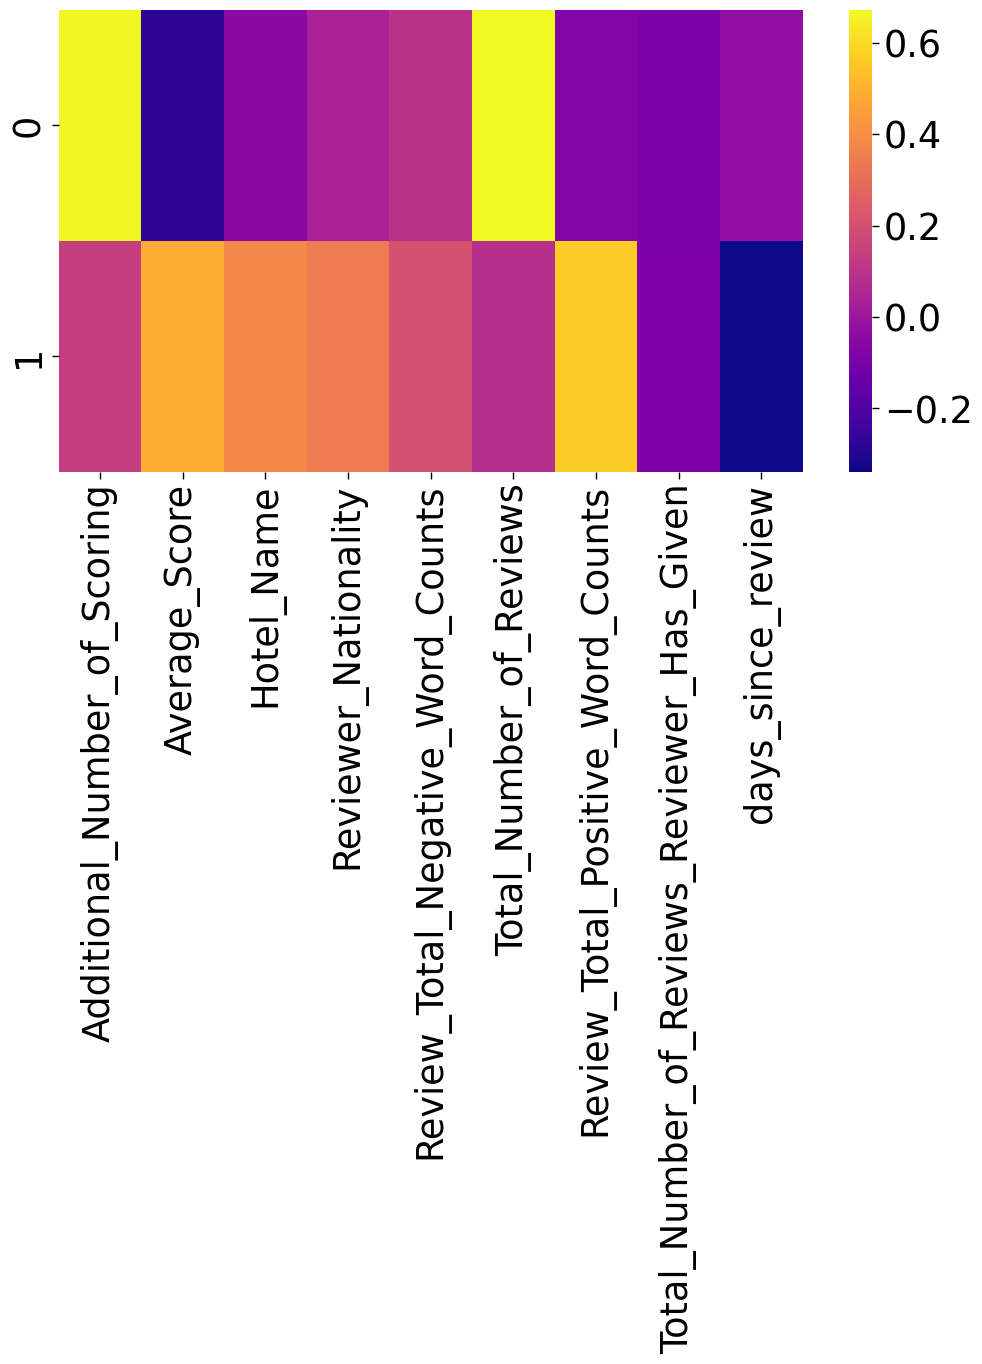

In [284]:
df_comp = pd.DataFrame(pca.components_,columns=X.columns)
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

In [285]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [286]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[102 128]
 [ 60 310]]


In [287]:
#Accuracy from confusion matrix
TP= confusion_matrix[1,1] #True positive
TN= confusion_matrix[0,0] #True negative
Total=len(y_test)
print("Accuracy from confusion matrix is ", (TN+TP)/Total)

Accuracy from confusion matrix is  0.6866666666666666


# SVD

In [308]:
# evaluate svd with logistic regression algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression

df2 = df[['Additional_Number_of_Scoring','Average_Score', 'Review_Total_Negative_Word_Counts','Total_Number_of_Reviews', 'Review_Total_Positive_Word_Counts', 'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score' ]]
X = df2.drop(['Reviewer_Score'], axis=1)
y = df2['Reviewer_Score']
y = y.apply(lambda x: 1 if x < 7 else 0)

# define the pipeline
steps = [('svd', TruncatedSVD(n_components=4)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.722 (0.014)


>1 0.584 (0.001)
>2 0.584 (0.001)
>3 0.631 (0.016)
>4 0.722 (0.014)
>5 0.722 (0.014)


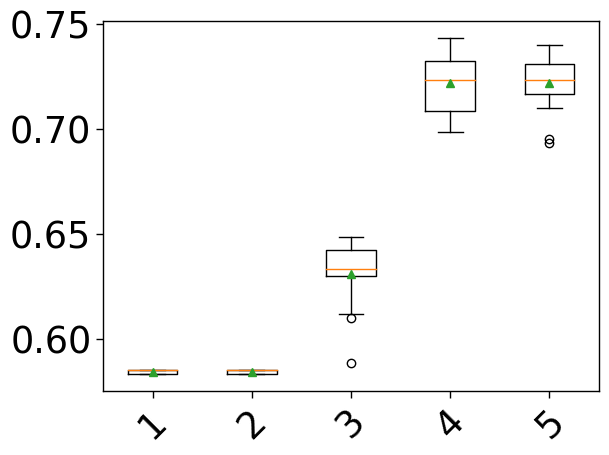

In [309]:
# compare svd number of components with logistic regression algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

df2 = df[['Additional_Number_of_Scoring','Average_Score', 'Review_Total_Negative_Word_Counts','Total_Number_of_Reviews', 'Review_Total_Positive_Word_Counts', 'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score' ]]
X = df2.drop(['Reviewer_Score'], axis=1)
y = df2['Reviewer_Score']
y = y.apply(lambda x: 1 if x < 7 else 0)

# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(1,6):
		steps = [('svd', TruncatedSVD(n_components=i)), ('m', LogisticRegression())]
		models[str(i)] = Pipeline(steps=steps)
	return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores


# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.xticks(rotation=45)
pyplot.show()

# Hyper Parameter Tuning :

## Logistic regression :

In [385]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, auc,roc_curve
from sklearn.preprocessing import MinMaxScaler

In [409]:
df2 = df[['Average_Score', 'Review_Total_Negative_Word_Counts', 'Review_Total_Positive_Word_Counts','Reviewer_Score','is_bad_review']]

In [410]:
X=df2.iloc[:,:-1]
y=df2.iloc[:,-1]

In [411]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

scaler = MinMaxScaler() #saga solver requires features to be scaled for model conversion

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [412]:
clf = [
    LogisticRegression(solver='newton-cg',penalty='l2',max_iter=1000),
    LogisticRegression(solver='lbfgs',penalty='l2',max_iter=1000),
    LogisticRegression(solver='sag',penalty='l2',max_iter=1000),
    LogisticRegression(solver='saga',penalty='l2',max_iter=1000)
    ]
clf_columns = []
clf_compare = pd.DataFrame(columns = clf_columns)

row_index = 0
for alg in clf:
        
    predicted = alg.fit(X_train, y_train).predict(X_test)
    fp, tp, th = roc_curve(y_test, predicted)
    clf_name = alg.__class__.__name__
    clf_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train, y_train), 5)
    clf_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test, y_test), 5)
    clf_compare.loc[row_index, 'Precission'] = round(precision_score(y_test, predicted),5)
    clf_compare.loc[row_index, 'Recall'] = round(recall_score(y_test, predicted),5)
    clf_compare.loc[row_index, 'AUC'] = round(auc(fp, tp),5)

    row_index+=1
    
clf_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)
clf_compare

,Train Accuracy,Test Accuracy,Precission,Recall,AUC
0,0.97911,0.976,0.9542,1.0,0.976
1,0.97911,0.976,0.9542,1.0,0.976
2,0.97911,0.976,0.9542,1.0,0.976
3,0.97911,0.976,0.9542,1.0,0.976


## knn :

In [413]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import GridSearchCV

In [414]:
df2 = df[['Average_Score', 'Review_Total_Negative_Word_Counts', 'Review_Total_Positive_Word_Counts', 'Reviewer_Score']]

In [415]:
X=df2.iloc[:,:-1]
y=df2.iloc[:,-1]

In [416]:
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',metric_params=None, n_jobs=None, n_neighbors=5, p=2, weights='uniform')

KNeighborsRegressor()

In [417]:
model = KNeighborsRegressor(n_neighbors=18)

In [418]:
# Select an algorithm
algorithm = KNeighborsRegressor()

In [423]:
# Create 3 folds
seed = 13
kfold = KFold(n_splits=6, shuffle=True, random_state=seed)

In [424]:
# Define our candidate hyperparameters
hp_candidates = [{'n_neighbors': [2,3,4,5,6], 'weights': ['uniform','distance']}]

In [425]:
# Search for best hyperparameters
grid = GridSearchCV(estimator=algorithm, param_grid=hp_candidates, cv=kfold, scoring='r2')
grid.fit(X, y)

GridSearchCV(cv=KFold(n_splits=6, random_state=13, shuffle=True),
             estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': [2, 3, 4, 5, 6],
                          'weights': ['uniform', 'distance']}],
             scoring='r2')

In [426]:
 grid.score(X_test,y_test)

C:\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


ValueError: X has 4 features, but KNeighborsRegressor is expecting 3 features as input.

In [209]:
# Get the results
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

0.21618730810754924
KNeighborsRegressor(n_neighbors=6)
{'n_neighbors': 6, 'weights': 'uniform'}


## DECISION TREE :

In [147]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

In [148]:
from sklearn.tree import DecisionTreeRegressor

In [149]:
df2 = df[['Average_Score', 'Review_Total_Negative_Word_Counts', 'Review_Total_Positive_Word_Counts', 'Reviewer_Score']]

In [151]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2.iloc[:,:-1], df2.iloc[:,-1], test_size=0.3 ,random_state=0)

In [152]:
y_test  = round(y_test).astype(int)
y_train = round(y_train).astype(int)

In [153]:
from sklearn.tree import DecisionTreeRegressor
reg_decision_model=DecisionTreeRegressor()
# fit independent varaibles to the dependent variables
reg_decision_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [154]:
prediction=reg_decision_model.predict(X_test)

In [156]:
# Hyper parameters range intialization for tuning 
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90]}

In [158]:
# calculating different regression metrics
from sklearn.model_selection import GridSearchCV

In [159]:
tuning_model=GridSearchCV(reg_decision_model,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)

In [160]:
# function for calculating how much time take for hyperparameter tuning

def timer(start_time=None):
    if not start_time:
        start_time=datetime.now()
        return start_time
    elif start_time:
        thour,temp_sec=divmod((datetime.now()-start_time).total_seconds(),3600)
        tmin,tsec=divmod(temp_sec,60)
        #print(thour,":",tmin,':',round(tsec,2))

In [168]:
X=df2.iloc[:,:-1]
y=df2.iloc[:,-1]

In [169]:
%%capture
from datetime import datetime

start_time=timer(None)

tuning_model.fit(X,y)

timer(start_time)

In [170]:
# best hyperparameters 
tuning_model.best_params_

{'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [171]:
tuned_hyper_model= DecisionTreeRegressor(max_depth=5,max_features='auto',
                                         max_leaf_nodes=None,min_samples_leaf=1,min_weight_fraction_leaf=0.1,splitter='best')

In [172]:
# fitting model
tuned_hyper_model.fit(X_train,y_train)

C:\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


DecisionTreeRegressor(max_depth=5, max_features='auto',
                      min_weight_fraction_leaf=0.1)

In [173]:
# prediction 
tuned_pred=tuned_hyper_model.predict(X_test)

In [175]:
# without hyperparameter tuning 
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE: 2.176111111111111
MSE: 8.44824074074074
RMSE: 2.906585753206112


In [177]:
# With hyperparameter tuned 
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,tuned_pred))
print('MSE:', metrics.mean_squared_error(y_test, tuned_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,tuned_pred)))

MAE: 1.71323731234575
MSE: 4.308024714973497
RMSE: 2.075578164024062
